# Άσκηση $1^{η}$ 

Θα λύσουμε με τρεις διαφορετικές μεθόδους το πρόβλημα αρχικών τιμών $\frac{dA}{dt}=-\lambda A$ , $0 \leq t \leq 8$ s, $A(0)= 1kBq$ , όπου $\lambda=ln(2)/2 s^{-1}$.
Η αναλυτική λύση είναι $A(t)=e^{-\frac{ln2}{2}\cdot t}$


## Μέθοδος Euler 

Θα λύσουμε την εξίσωση με χρήση της μεθόδου Euler.
1. Λύνουμε για τρεία διαφορετικά χρονικά βήματα $τ=0.1s$,$τ=0.2s$,$τ=0.4s$
2. Εκτυπώνουμε τις τιμές της διαφορικής για μερικούς χρόνους t=1,2,3,...7.
3. Απεικονίζουμε τις 3 γραφικές παραστάσεις και μαζί την αναλυτική λύση για οπτική σύγκριση.
4. Σχεδιάζουμε την απόκλιση αναλυτικής από υπολογιστικής λύσης. 

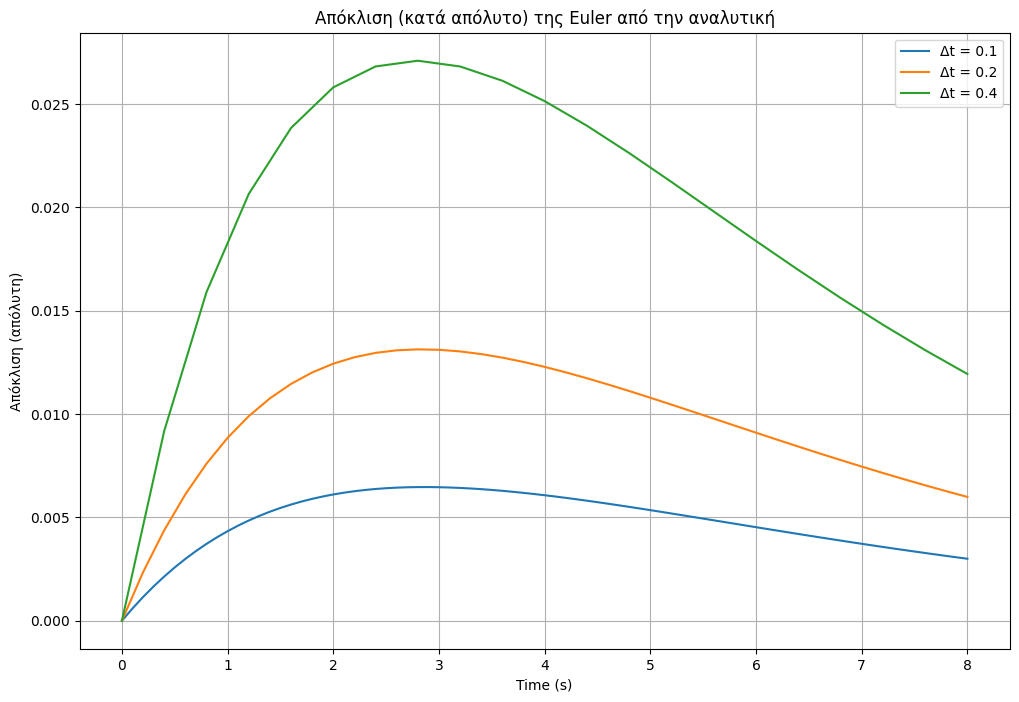

In [413]:
# Επαναφορά του κώδικα και εκτέλεση του ζητούμενου σχεδιαγράμματος απόκλισης μετά από αποτυχημένη εκτέλεση προηγουμένως
import numpy as np
import matplotlib.pyplot as plt

# Αρχικές συνθήκες και παράμετροι
A0 = 1  # Αρχική ποσότητα
t_max = 8  # Μέγιστος χρόνος παρατήρησης
time_steps = [0.1, 0.2, 0.4]  # Χρονικά βήματα για την μέθοδο Euler

# Συνάρτηση που υπολογίζει την παράγωγο dA/dt
def dA_dt(A, λ=np.log(2)/2):
    return -λ * A

# Υλοποίηση της μεθόδου Euler
def euler_method(time_step, dA_dt, A0, t_max):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(times.shape)
    A_values[0] = A0
    for i in range(1, len(times)):
        A_values[i] = A_values[i - 1] + time_step * dA_dt(A_values[i - 1])
    return times, A_values

# Αναλυτική λύση της εξίσωσης
def analytical_solution(times, λ=np.log(2)/2):
    return A0 * np.exp(-λ * times)

# Σχεδιασμός της απόκλισης μεταξύ της μεθόδου Euler και της αναλυτικής λύσης
plt.figure(figsize=(12, 8))

# Υπολογισμός αναλυτικής λύσης για συνεχείς χρόνους
times_continuous = np.linspace(0, t_max, 500)
A_analytical_continuous = analytical_solution(times_continuous)

for Δt in time_steps:
    times, A_euler = euler_method(Δt, dA_dt, A0, t_max)
    A_analytical = analytical_solution(times)
    deviation = np.abs(A_euler - A_analytical)
    plt.plot(times, deviation, label=f'Δt = {Δt}')

plt.xlabel('Time (s)')
plt.ylabel('Απόκλιση (απόλυτη)')
plt.title('Απόκλιση (κατά απόλυτο) της Euler από την αναλυτική')
plt.legend()
plt.grid(True)
plt.show()


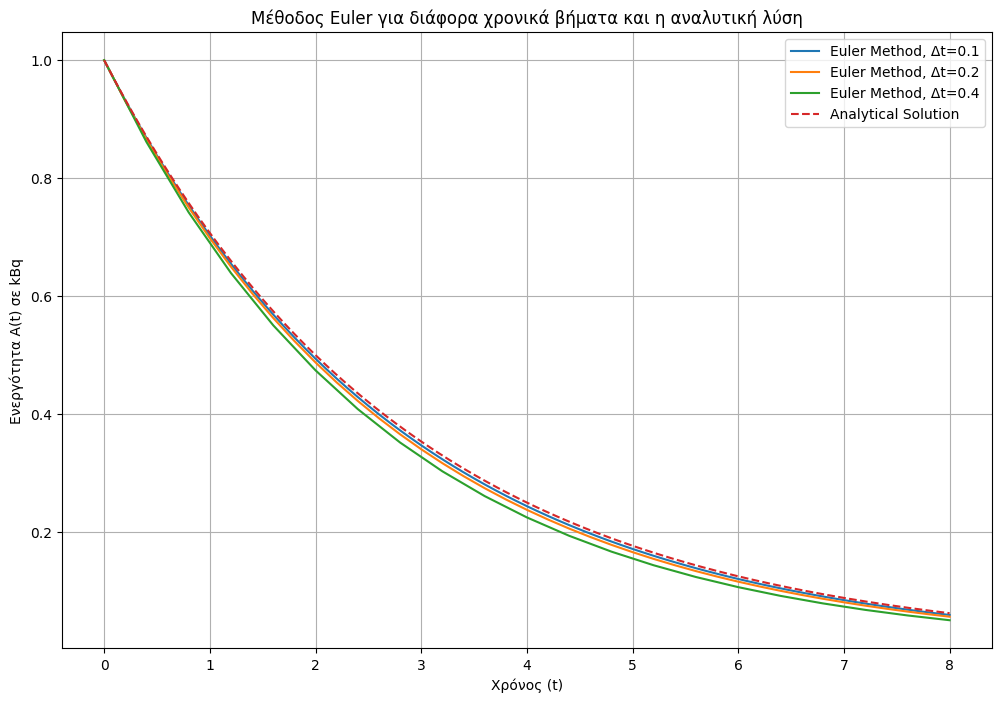

{0.1: [0.7027727316548675,
  0.4938895123576445,
  0.34709208173527245,
  0.243926850416872,
  0.17142513899143344,
  0.12047291320332507,
  0.08466507830232056],
 0.2: [0.6982552821142722,
  0.4875604390004819,
  0.3404416518820399,
  0.23771518167834257,
  0.16598588124565655,
  0.11590051833617197,
  0.08092814912801413],
 0.4: [0.74195924833275,
  0.47418753277360326,
  0.35182782538546387,
  0.2248538162379171,
  0.16683236848063523,
  0.10662287635658707,
  0.07910982919660907]}

In [414]:
import numpy as np
import matplotlib.pyplot as plt

# ΑΣ
A0 = 1
t_max = 8
time_steps = [0.1, 0.2, 0.4]

# Παράγωγος dA/dt
def dA_dt(A):
    return -np.log(2)/2 * A

# Κάνουμε την Euler
def euler_method(time_step):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(len(times))
    A_values[0] = A0

    for i in range(1, len(times)):
        A_values[i] = A_values[i-1] + time_step * dA_dt(A_values[i-1])
    
    return times, A_values

# Η αναλυτική λύση
def analytical_solution(times):
    return np.exp(-np.log(2)/2 * times)

# Απεικόνιση αναλυτικής και για τα διάφορα βήματα 
plt.figure(figsize=(12, 8))

for time_step in time_steps:
    times, A_values = euler_method(time_step)
    plt.plot(times, A_values, label=f'Euler Method, Δt={time_step}')

times_continuous = np.linspace(0, t_max, 500)
A_analytical = analytical_solution(times_continuous)
plt.plot(times_continuous, A_analytical, label='Analytical Solution', linestyle='--')

plt.xlabel('Χρόνος (t)')
plt.ylabel('Ενεργότητα A(t) σε kBq')
plt.title('Μέθοδος Euler για διάφορα χρονικά βήματα και η αναλυτική λύση')
plt.legend()
plt.grid(True)
plt.show()

# Εκτύπωση των τιμών A για τους χρόνους t = 1, 2, 3, 4, 5, 6, 7
time_points = [1, 2, 3, 4, 5, 6, 7]
A_values_at_time_points = {time_step: [] for time_step in time_steps}

for time_step in time_steps:
    times, A_values = euler_method(time_step)
    for t in time_points:
        # Βρίσκουμε τον πλησιέστερο χρόνο στο διάνυσμα χρόνων
        index = np.argmin(np.abs(times - t))
        A_values_at_time_points[time_step].append(A_values[index])

A_values_at_time_points


## Με χρήση της μεθόδου Runge-Kutta 2ης τάξης (RK2)

Η απόκλιση της RK2 και της RK4 είναι πιο κάτω για να μπορεί να γίνει σωστά compile. 

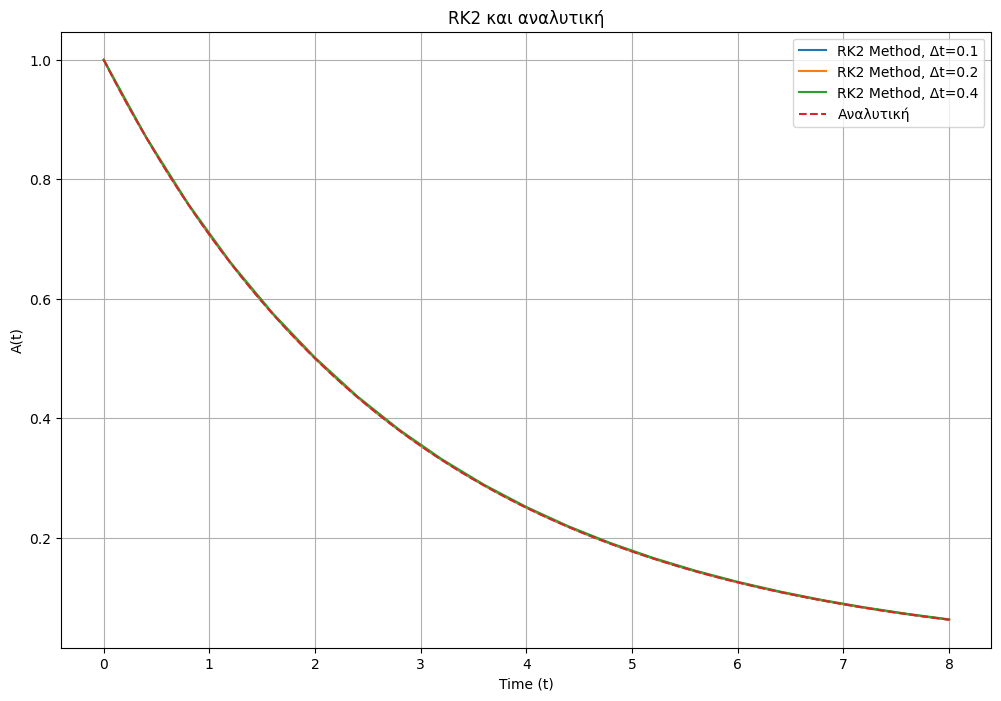

{0.1: [0.7071571350098222,
  0.5000712135952998,
  0.35362892670693713,
  0.2500712186666761,
  0.17683964654074152,
  0.1250534178039004,
  0.08843241665739252],
 0.2: [0.7073135319629371,
  0.5002924324978849,
  0.3538636074444083,
  0.25029251801465074,
  0.1770352849408397,
  0.12521945267357032,
  0.08856941334100889],
 0.4: [0.7586055057129998,
  0.5012333689507543,
  0.3802383933331176,
  0.25123489014972306,
  0.19058817089478058,
  0.1259273103877184,
  0.09552915097975301]}

In [415]:
# Υλοποίηση της μεθόδου Runge-Kutta 2ης τάξης (RK2)
def runge_kutta_2nd_order_method(time_step):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(len(times))
    A_values[0] = A0

    for i in range(1, len(times)):
        k1 = dA_dt(A_values[i-1])
        k2 = dA_dt(A_values[i-1] + time_step * k1)
        A_values[i] = A_values[i-1] + time_step * (k1 + k2) / 2
    
    return times, A_values

# Δημιουργία διαγραμμάτων για RK2 και σύγκριση με την αναλυτική λύση
plt.figure(figsize=(12, 8))

for time_step in time_steps:
    times, A_values = runge_kutta_2nd_order_method(time_step)
    plt.plot(times, A_values, label=f'RK2 Method, Δt={time_step}')

# Σχεδίαση της αναλυτικής λύσης
plt.plot(times_continuous, A_analytical, label='Αναλυτική', linestyle='--')

plt.xlabel('Time (t)')
plt.ylabel('A(t)')
plt.title('RK2 και αναλυτική')
plt.legend()
plt.grid(True)
plt.show()

# Εκτύπωση των τιμών A για τους χρόνους t = 1, 2, 3, 4, 5, 6, 7 με τη μέθοδο RK2
A_values_at_time_points_RK2 = {time_step: [] for time_step in time_steps}

for time_step in time_steps:
    times, A_values = runge_kutta_2nd_order_method(time_step)
    for t in time_points:
        index = np.argmin(np.abs(times - t))
        A_values_at_time_points_RK2[time_step].append(A_values[index])

A_values_at_time_points_RK2


## Με χρήση της μεθόδου Runge-Kutta 4ης τάξης (RK4)

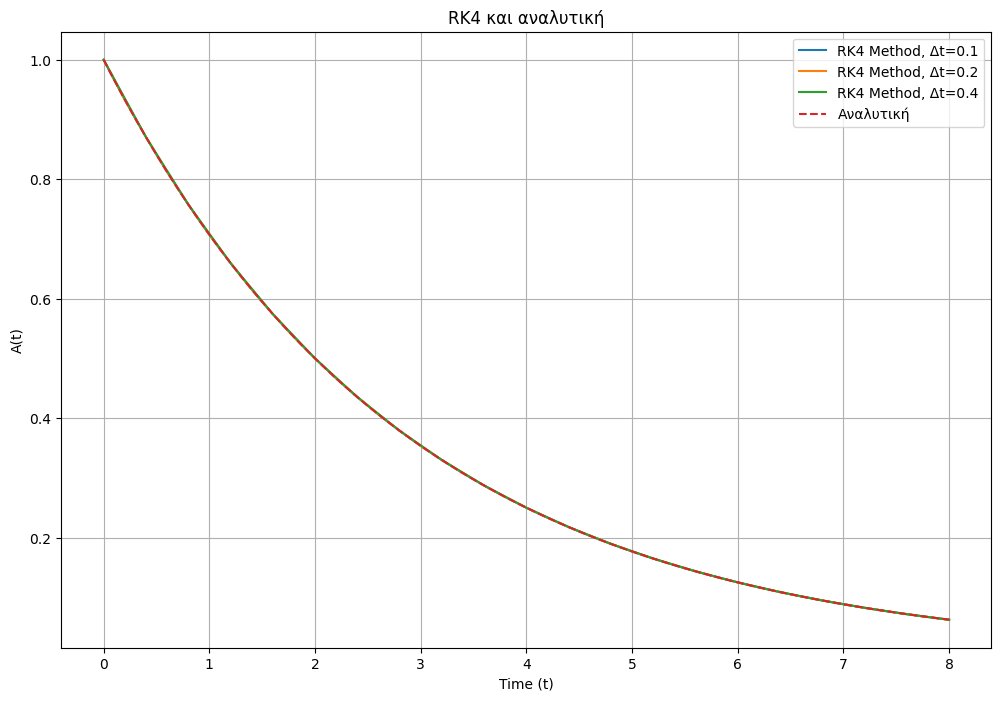

{0.1: [0.7071067842192456,
  0.5000000042888826,
  0.3535533951423207,
  0.25000000428888264,
  0.17677669908750937,
  0.125000003216662,
  0.08838835030192918],
 0.2: [0.7071068311333317,
  0.5000000706354221,
  0.35355346551345535,
  0.2500000706354272,
  0.17677675773012602,
  0.1250000529765741,
  0.0883883913517639],
 0.4: [0.7578590093076087,
  0.5000011975407332,
  0.37893041222083806,
  0.2500011975421674,
  0.18946565989502276,
  0.1250008981577011,
  0.09473305684035664]}

In [417]:
# Υλοποίηση της μεθόδου Runge-Kutta 4ης τάξης (RK4)
def runge_kutta_4th_order_method(time_step):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(len(times))
    A_values[0] = A0

    for i in range(1, len(times)):
        k1 = dA_dt(A_values[i-1])
        k2 = dA_dt(A_values[i-1] + time_step * k1 / 2)
        k3 = dA_dt(A_values[i-1] + time_step * k2 / 2)
        k4 = dA_dt(A_values[i-1] + time_step * k3)
        A_values[i] = A_values[i-1] + time_step * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return times, A_values

# Δημιουργία διαγραμμάτων για RK4 και σύγκριση με την αναλυτική λύση
plt.figure(figsize=(12, 8))

for time_step in time_steps:
    times, A_values = runge_kutta_4th_order_method(time_step)
    plt.plot(times, A_values, label=f'RK4 Method, Δt={time_step}')

# Σχεδίαση της αναλυτικής λύσης
plt.plot(times_continuous, A_analytical, label='Αναλυτική', linestyle='--')

plt.xlabel('Time (t)')
plt.ylabel('A(t)')
plt.title('RK4 και αναλυτική')
plt.legend()
plt.grid(True)
plt.show()

# Εκτύπωση των τιμών A για τους χρόνους t = 1, 2, 3, 4, 5, 6, 7 με τη μέθοδο RK4
A_values_at_time_points_RK4 = {time_step: [] for time_step in time_steps}

for time_step in time_steps:
    times, A_values = runge_kutta_4th_order_method(time_step)
    for t in time_points:
        index = np.argmin(np.abs(times - t))
        A_values_at_time_points_RK4[time_step].append(A_values[index])

A_values_at_time_points_RK4


## Αποκλίσεις κατά απόλυτο των RK 

Για την RK2 πρώτα και παρακάτω για την RK4.

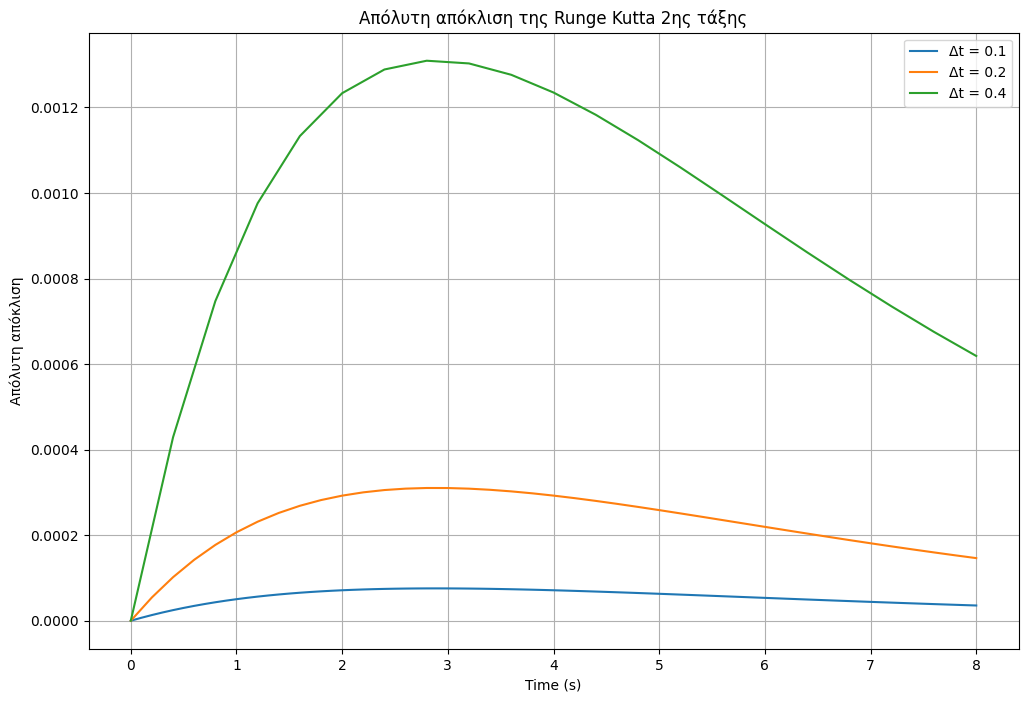

In [418]:
def runge_kutta_2nd_order(time_step, dA_dt, A0, t_max):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(times.shape)
    A_values[0] = A0
    for i in range(1, len(times)):
        k1 = dA_dt(A_values[i - 1])
        k2 = dA_dt(A_values[i - 1] + time_step * k1 / 2)
        A_values[i] = A_values[i - 1] + time_step * k2
    return times, A_values

plt.figure(figsize=(12, 8))

times_continuous = np.linspace(0, t_max, 500)
A_analytical_continuous = analytical_solution(times_continuous)

for Δt in time_steps:
    times, A_rk2 = runge_kutta_2nd_order(Δt, dA_dt, A0, t_max)
    A_analytical = analytical_solution(times)
    deviation = np.abs(A_rk2 - A_analytical)
    plt.plot(times, deviation, label=f'Δt = {Δt}')

plt.xlabel('Time (s)')
plt.ylabel('Απόλυτη απόκλιση')
plt.title('Απόλυτη απόκλιση της Runge Kutta 2ης τάξης')
plt.legend()
plt.grid(True)
plt.show()

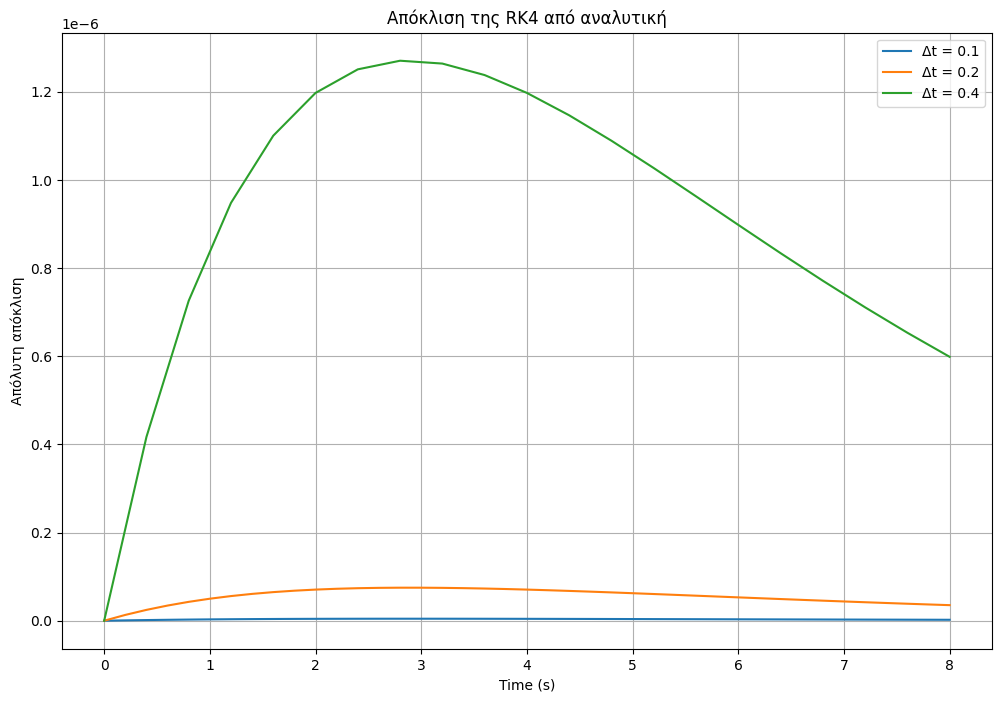

In [419]:
def runge_kutta_4th_order(time_step, dA_dt, A0, t_max):
    times = np.arange(0, t_max + time_step, time_step)
    A_values = np.zeros(times.shape)
    A_values[0] = A0
    for i in range(1, len(times)):
        k1 = dA_dt(A_values[i - 1])
        k2 = dA_dt(A_values[i - 1] + time_step * k1 / 2)
        k3 = dA_dt(A_values[i - 1] + time_step * k2 / 2)
        k4 = dA_dt(A_values[i - 1] + time_step * k3)
        A_values[i] = A_values[i - 1] + (time_step / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return times, A_values

plt.figure(figsize=(12, 8))

times_continuous = np.linspace(0, t_max, 500)
A_analytical_continuous = analytical_solution(times_continuous)

for Δt in time_steps:
    times, A_rk4 = runge_kutta_4th_order(Δt, dA_dt, A0, t_max)
    A_analytical = analytical_solution(times)
    deviation = np.abs(A_rk4 - A_analytical)
    plt.plot(times, deviation, label=f'Δt = {Δt}')

plt.xlabel('Time (s)')
plt.ylabel('Απόλυτη απόκλιση')
plt.title('Απόκλιση της RK4 από αναλυτική')
plt.legend()
plt.grid(True)
plt.show()


## Σχόλια 

Είναι οπτικά προφανές (ειδικά στην Euler) ότι όσο μειώνει το βήμα τόσο αυξάνει η ακρίβεια. Επίσης η ιεραρχία στην ακρίβεια είναι Euler<RK2<RK4 κάτι που φυσικά περιμέναμε καθώς η κάθε μέθοδος αποτελεί βελτίωση της προηγούμενης.

# Άσκηση $2^{η}$ 

## Α. Ερώτημα

Η Βραχυστόχρονη τροχιά έχει βέλτιστη λύση (τροχιά ελάχιστου χρόνου) μια 

$(1+y'^{2})y=k^{2} \Rightarrow 1+y'^{2}=\frac{k^{2}}{y} \Rightarrow y'^{2}=\frac{k^{2}}{y}-1 \Rightarrow y'=\pm \sqrt{\frac{k^{2}}{y}-1}$

Η παράγωγος θα πρέπει να είναι θετική ώστε το $y$ να αυξάνει με το $x$. Άρα κρατάμε την θετική λύση. 

$y'= \sqrt{\frac{k^{2}}{y}-1}$

Η λύση είναι μια κυκλοειδής τροχιά και προκύπτει μέσα από την επίλυση της Euler-Lagrange ΔΕ. 

## Β. και Γ. Ερωτήματα 

Θα λύσουμε με RK4 και βήμα 0.01, θα σχεδιάσουμε τη λύση μέχρι το $x_{0}=1$.

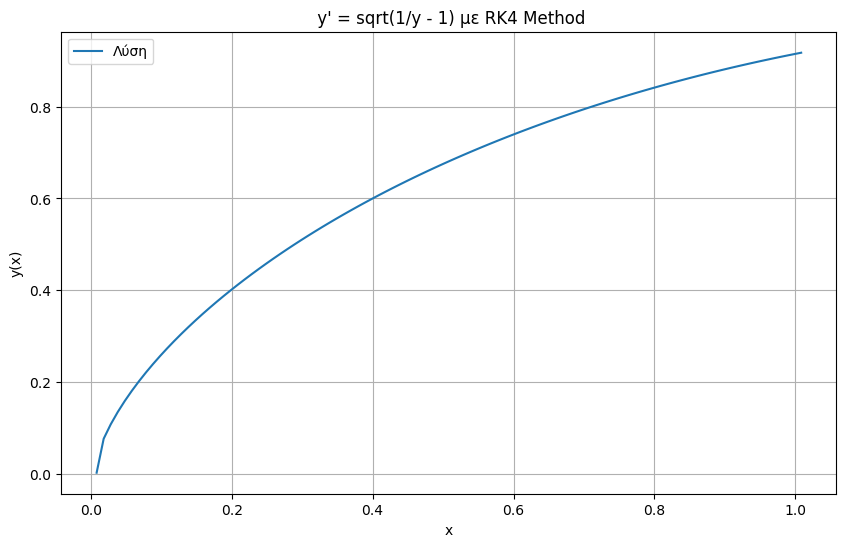

(1.0083, 0.9175328776374365)

In [420]:
# Ορίζω την παράγωγο y' 
def dy_dx(y):
    return np.sqrt(1/y - 1)

# ΑΣ
x0 = 0.0083
y0 = 0.0025
x_max = 1
dx = 0.01

# RK4
def runge_kutta_4th_order_method_dy_dx(x0, y0, x_max, dx):
    x_values = np.arange(x0, x_max + dx, dx)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        k1 = dy_dx(y_values[i-1])
        k2 = dy_dx(y_values[i-1] + dx * k1 / 2)
        k3 = dy_dx(y_values[i-1] + dx * k2 / 2)
        k4 = dy_dx(y_values[i-1] + dx * k3)
        y_values[i] = y_values[i-1] + dx * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return x_values, y_values

x_values, y_values = runge_kutta_4th_order_method_dy_dx(x0, y0, x_max, dx)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Λύση')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(' y\' = sqrt(1/y - 1) με RK4 Method')
plt.grid(True)
plt.legend()
plt.show()

# Επιστροφή των τελικών τιμών x και y για επαλήθευση
x_values[-1], y_values[-1]


In [422]:
# Εκτύπωση κάποιων τιμών των x και y για επαλήθευση
selected_indices = np.round(np.linspace(1, len(x_values) - 2, 20)).astype(int)
selected_x_values = x_values[selected_indices]
selected_y_values = y_values[selected_indices]

for i in range(len(selected_x_values)):
    print(f"x = {selected_x_values[i]:.4f}, y = {selected_y_values[i]:.4f}")


x = 0.0183, y = 0.0765
x = 0.0683, y = 0.2016
x = 0.1183, y = 0.2893
x = 0.1683, y = 0.3613
x = 0.2283, y = 0.4350
x = 0.2783, y = 0.4889
x = 0.3283, y = 0.5376
x = 0.3783, y = 0.5819
x = 0.4283, y = 0.6225
x = 0.4783, y = 0.6599
x = 0.5383, y = 0.7010
x = 0.5883, y = 0.7324
x = 0.6383, y = 0.7615
x = 0.6883, y = 0.7884
x = 0.7383, y = 0.8134
x = 0.7883, y = 0.8364
x = 0.8483, y = 0.8617
x = 0.8983, y = 0.8809
x = 0.9483, y = 0.8985
x = 0.9983, y = 0.9145


## References 

[1] Hector J. Sussmann, Jan C. Willems: The Brachistochrone Problem and Modern Control Theory, World Scientific (2002) 

[2] Wolfram MathWorld: https://mathworld.wolfram.com/BrachistochroneProblem.html

[3] APMonitor, Brachistochrone Optimal Control: https://apmonitor.com/wiki/index.php/Apps/BrachistochroneProblem

# Άσκηση $3^{η}$ 

## Α.Ερώτημα 


Μετασχηματίζω την δε δεύτερης σε σύστημα πρώτης τάξης με αρχικές ομογενείς. 

$ \theta'' = -\frac{g}{l} \sin(\theta) + C\cos(\theta) \sin(\Omega t) $

Ορίζω νέα μεταβλητή $z=\theta'$ και προκύπτει, $z'=-\frac{g}{l} \sin(\theta) + C\cos(\theta) \sin(\Omega t)$

Οι αρχικές συνθήκες είναι ομογενείς. Άρα έχω ένα σύστημα δύο διαφορικών πρώτης τάξης και το λύνω με RK4. 

Αρχικά θα πούμε την μεταβλητή $\theta \longrightarrow y$ για λόγους ευκολίας με το πρόγραμμα. 


## B. και C. ερωτήματα 

Αντικαθιστώ και λύνω με RK4 και βήμα 0.01, $l= 10cm$, $C=2s^{-2}$, $Ω= 5s^{-1}$

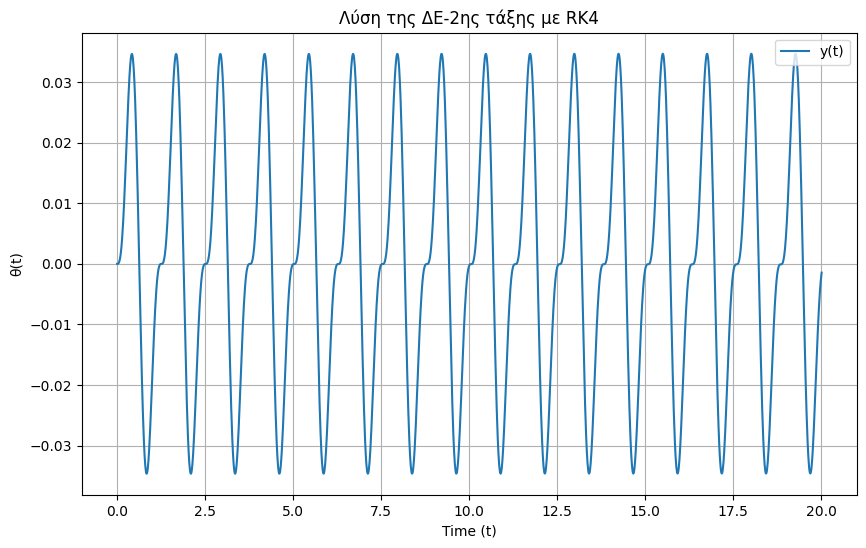

array([ 0.      , -0.018313, -0.026678,  0.030506,  0.014421, -0.000052,
       -0.022257, -0.021751,  0.033119,  0.010788, -0.000283, -0.02602 ,
       -0.015908,  0.034465,  0.007579, -0.000855, -0.029358, -0.009384,
        0.034563,  0.004911, -0.001902])

In [423]:
def rk4_system(dy_dt, dz_dt, t0, y0, z0, t_max, dt):
    """
    Runge-Kutta 4ης τάξης για το σύστημα των 2 εξισώσεων.
    """
    # Αρχικοποίηση των arrays για τις τιμές του χρόνου, y και z
    t_values = np.arange(t0, t_max + dt, dt)
    y_values = np.zeros(len(t_values))
    z_values = np.zeros(len(t_values))
    y_values[0], z_values[0] = y0, z0

    # Εφαρμογή της μεθόδου RK4
    for i in range(len(t_values) - 1):
        t = t_values[i]
        y = y_values[i]
        z = z_values[i]

        ky1 = dt * dy_dt(y, z, t)
        kz1 = dt * dz_dt(y, z, t)

        ky2 = dt * dy_dt(y + ky1/2, z + kz1/2, t + dt/2)
        kz2 = dt * dz_dt(y + ky1/2, z + kz1/2, t + dt/2)

        ky3 = dt * dy_dt(y + ky2/2, z + kz2/2, t + dt/2)
        kz3 = dt * dz_dt(y + ky2/2, z + kz2/2, t + dt/2)

        ky4 = dt * dy_dt(y + ky3, z + kz3, t + dt)
        kz4 = dt * dz_dt(y + ky3, z + kz3, t + dt)

        y_values[i+1] = y + (ky1 + 2*ky2 + 2*ky3 + ky4) / 6
        z_values[i+1] = z + (kz1 + 2*kz2 + 2*kz3 + kz4) / 6

    return t_values, y_values, z_values

# Ορισμός των δύο διαφορικών εξισώσεων
def dy_dt(y, z, t):
    return z

def dz_dt(y, z, t):
    return -100 * np.sin(y) + 2 * np.cos(y) * np.sin(5 * t)

# Αρχικές συνθήκες και παράμετροι
t0, y0, z0 = 0, 0, 0
t_max = 20
dt = 0.01

t_values, y_values, z_values = rk4_system(dy_dt, dz_dt, t0, y0, z0, t_max, dt)

# Δημιουργία διαγράμματος για τη λύση
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('Time (t)')
plt.ylabel('θ(t)')
plt.title('Λύση της ΔΕ-2ης τάξης με RK4')
plt.grid(True)
plt.legend()
plt.show()

# Εκτύπωση μερικών τιμών της y
y_values_sample = y_values[::100]  # Δείγμα κάθε 100 βημάτων
y_values_sample


## D. και E. ερωτήματα 

Θα βρούμε λύσεις για διαφορετικά Ω και θα δούμε που έχει μεγαλύτερο πλάτος και διακρότημα. 

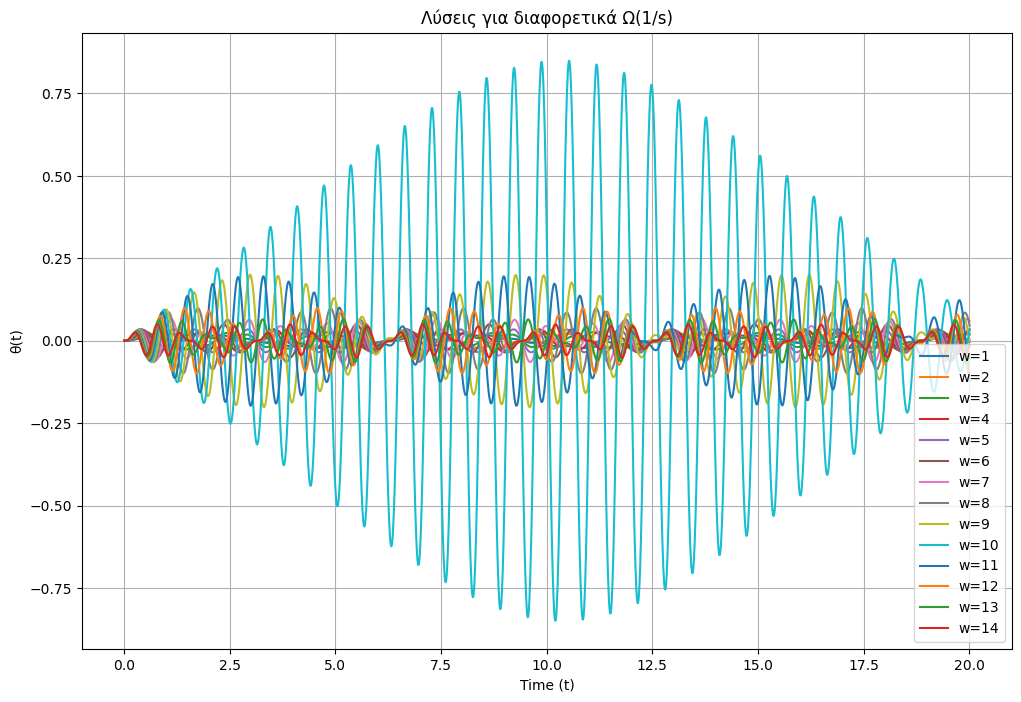

In [424]:
plt.figure(figsize=(12, 8))

# Επανάληψη για τις τιμές του w από 1 έως 14
for w in range(1, 15):
    # Τροποποιημένη συνάρτηση dz_dt για να λάβει υπόψη την τιμή του w
    def dz_dt(y, z, t, w=w):
        return -100 * np.sin(y) + 2 * np.cos(y) * np.sin(w * t)

    # Εφαρμογή της μεθόδου RK4 για κάθε w
    t_values, y_values, _ = rk4_system(dy_dt, dz_dt, t0, y0, z0, t_max, dt)

    # Σχεδίαση της λύσης για κάθε w
    plt.plot(t_values, y_values, label=f'w={w}')

plt.xlabel('Time (t)')
plt.ylabel('θ(t)')
plt.title('Λύσεις για διαφορετικά Ω(1/s)')
plt.grid(True)
plt.legend()
plt.show()


Παρακάτω με την odeint βρίσκουμε για διάφορα $\Omega$ το αντίστοιχο πλάτος ταλάντωσης. Βλέπουμε υπάρχει μια συμμετρία γύρω από το μέγιστο. 

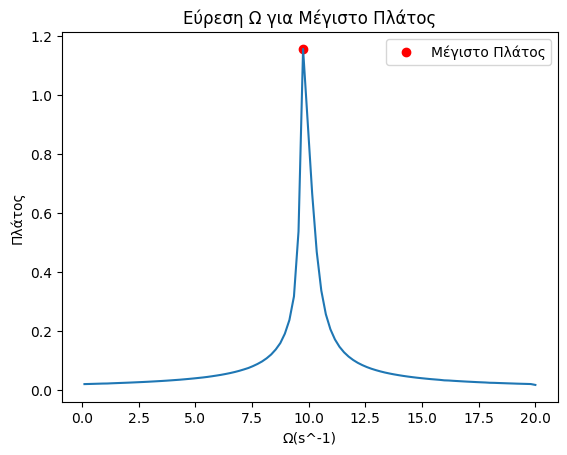

Η τιμή του Ω που μεγιστοποιεί το πλάτος είναι: 9.748484848484848


In [425]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Δοσμένη διαφορική εξίσωση
def derivative(x, t, omega):
    return [x[1], -100*np.sin(x[0]) + 2*np.cos(x[0]) * np.sin(omega * t)]

# Υπολογισμός πλάτους για δεδομένο ω
def calculate_amplitude(omega):
    # Αρχικές συνθήκες
    initial_conditions = [0, 0]

    # Χρονική διάσταση
    t = np.linspace(0, 10 * np.pi, 1000)

    # Λύση της διαφορικής εξίσωσης για το δοσμένο ω
    solution = odeint(derivative, initial_conditions, t, args=(omega,))

    # Υπολογισμός πλάτους
    amplitude = np.max(np.abs(solution[:, 0]))

    return amplitude

# Δοκιμή διάφορων τιμών του ω
omega_values = np.linspace(0.1, 20, 100)
amplitude_values = [calculate_amplitude(omega) for omega in omega_values]

# Βρίσκουμε το ω που μεγιστοποιεί το πλάτος
optimal_omega = omega_values[np.argmax(amplitude_values)]

# Σχεδίαση του γράφου πλάτους ως συνάρτηση του ω
plt.plot(omega_values, amplitude_values)
plt.scatter(optimal_omega, np.max(amplitude_values), color='red', label='Μέγιστο Πλάτος')
plt.xlabel('Ω(s^-1)')
plt.ylabel('Πλάτος')
plt.title('Εύρεση Ω για Μέγιστο Πλάτος')
plt.legend()
plt.show()

print(f"Η τιμή του Ω που μεγιστοποιεί το πλάτος είναι: {optimal_omega}")


Ο καλύτερος συντονισμός είναι για $Ω \approx 10s^{-1}$. Βέβαια υπάρχουν και άλλα διακροτήματα που προκύπτουν από την σύνθεση των ταλαντώσεων, πχ $Ω \approx 9s^{-1}$ με μικρότερη περίοδο. 

# Άσκηση $4^{η}$

Εφόσον έχουμε δεύτερης τάξης ΔΕ θα βγάλουμε τα αντίστοιχα συστήματα με ή χωρίς αντίσταση αέρα. 



Ταχύτητα $v=20\frac{m}{s}$ και γωνία ρίψης $\theta=\frac{\pi}{3}$, με επιπλέον αεροδυναμική τριβή που επιβραδύνει το σώμα με $\vec{F}=-0.5\vec{v}$, 

 
Η δύναμη αντίστασης ανά μονάδα μάζας στις συνιστώσες $x$ και $y$ είναι:

$f_{dx} = -0.5 \cdot v_{x}$


$f_{dy} = -0.5 \cdot v_{y}$

Οι διαφορικές εξισώσεις που περιγράφουν την κίνηση είναι:

Για την οριζόντια κίνηση:

$v_x' = f_{dx}$

$x' = v_{x}$

Για την κατακόρυφη κίνηση:

$v_{y}' = -g + f_{dy}$

$y' = v_{y}$

Οι αρχικές συνθήκες είναι $x(0) = 0 \  $ , $y(0) = 0 \ $, $\ v_{x}(0) = 20 \cdot \cos\left(\frac{\pi}{3}\right) $ και $ \ v_{y}(0) = 20 \cdot \sin\left(\frac{\pi}{3}\right)$.


## Βολή σφαίρας χωρίς αντίσταση 

Διερεύνιση για διάφορα βήματα και διάφορες χρονικές διαμερίσεις. 

Η αναλυτική λύση στην πρώτη περίπτωση είναι, 


$x(t)=v_{0}cos(\theta)t \ $ , $y(t)=v_{0}sin(\theta)t-\frac{1}{2}gt^{2}$




## Μέθοδος Euler

Επιλύουμε την διαφορική εξίσωση με τη μέθοδο Euler. 

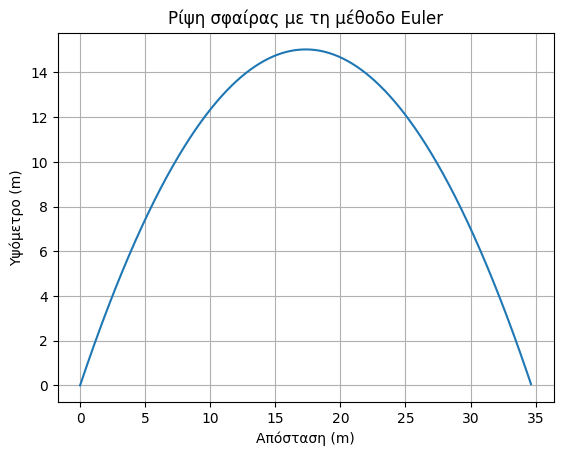

In [426]:
import numpy as np
import matplotlib.pyplot as plt

# Αρχικά δεδομένα
v0 = 20.0  # αρχική ταχύτητα σε m/s
theta = np.pi/3  # γωνία ρίψης σε ακτίνια
g = 10.0  # επιτάχυνση της βαρύτητας σε m/s^2
t_end = 2 * v0 * np.sin(theta) / g  # τελικός χρόνος ρίψης
N = 1000  # αριθμός βημάτων

# Διαμέριση του χρόνου
dt = t_end / N

# Αρχικές συνθήκες
x = np.zeros(N+1)
y = np.zeros(N+1)
vx = np.zeros(N+1)
vy = np.zeros(N+1)
x[0] = 0
y[0] = 0
vx[0] = v0 * np.cos(theta)
vy[0] = v0 * np.sin(theta)

# Υπολογισμός των θέσεων και των ταχυτήτων χρησιμοποιώντας τη μέθοδο Euler
for i in range(N):
    vx[i+1] = vx[i]
    vy[i+1] = vy[i] - g * dt
    x[i+1] = x[i] + vx[i] * dt
    y[i+1] = y[i] + vy[i] * dt

# Σχεδίαση της τροχιάς
plt.figure()
plt.plot(x, y)
plt.xlabel('Απόσταση (m)')
plt.ylabel('Υψόμετρο (m)')
plt.title('Ρίψη σφαίρας με τη μέθοδο Euler')
plt.grid(True)
plt.show()



## Διερεύνιση για την μέθοδο Euler.

Θα δοκιμάσουμε διάφορα μεγέθη βημάτων και διάφορους αριθμούς βημάτων

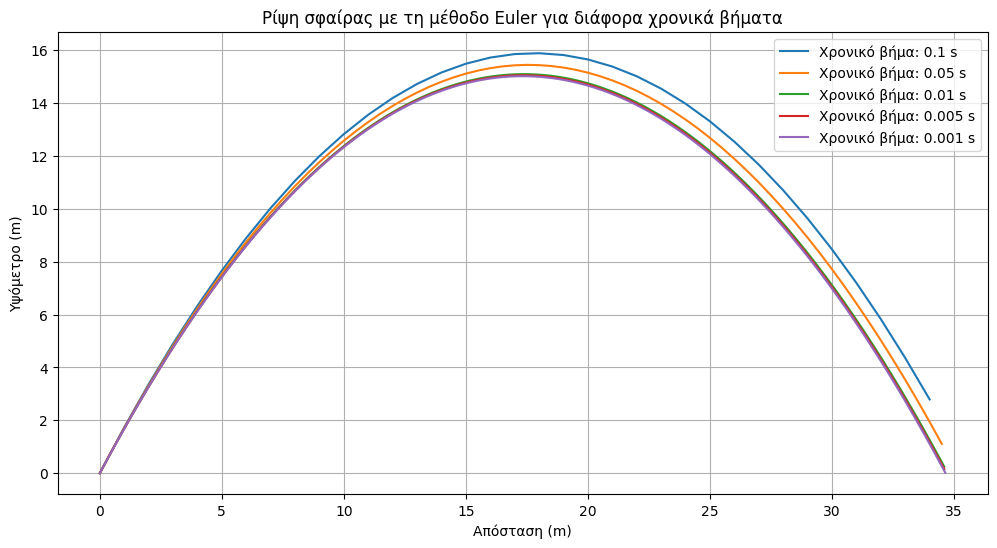

In [427]:
# Μεγέθη βημάτων για δοκιμή
time_steps_euler = [0.1, 0.05, 0.01, 0.005, 0.001]

# Δημιουργία γραφημάτων για τη μέθοδο Euler με διάφορα μεγέθη χρονικού βήματος
plt.figure(figsize=(12, 6))

for dt in time_steps_euler:
    # Υπολογισμός του συνολικού αριθμού βημάτων
    N = int(t_end / dt)
    
    # Αρχικές συνθήκες
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    vx = np.zeros(N+1)
    vy = np.zeros(N+1)
    x[0] = 0
    y[0] = 0
    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    # Υπολογισμός των θέσεων και των ταχυτήτων χρησιμοποιώντας τη μέθοδο Euler
    for i in range(N):
        vx[i+1] = vx[i]
        vy[i+1] = vy[i] - g * dt
        x[i+1] = x[i] + vx[i] * dt
        y[i+1] = y[i] + vy[i] * dt
    
    # Σχεδίαση της τροχιάς
    plt.plot(x, y, label=f'Χρονικό βήμα: {dt} s')

plt.xlabel('Απόσταση (m)')
plt.ylabel('Υψόμετρο (m)')
plt.title('Ρίψη σφαίρας με τη μέθοδο Euler για διάφορα χρονικά βήματα')
plt.legend()
plt.grid(True)
plt.show()


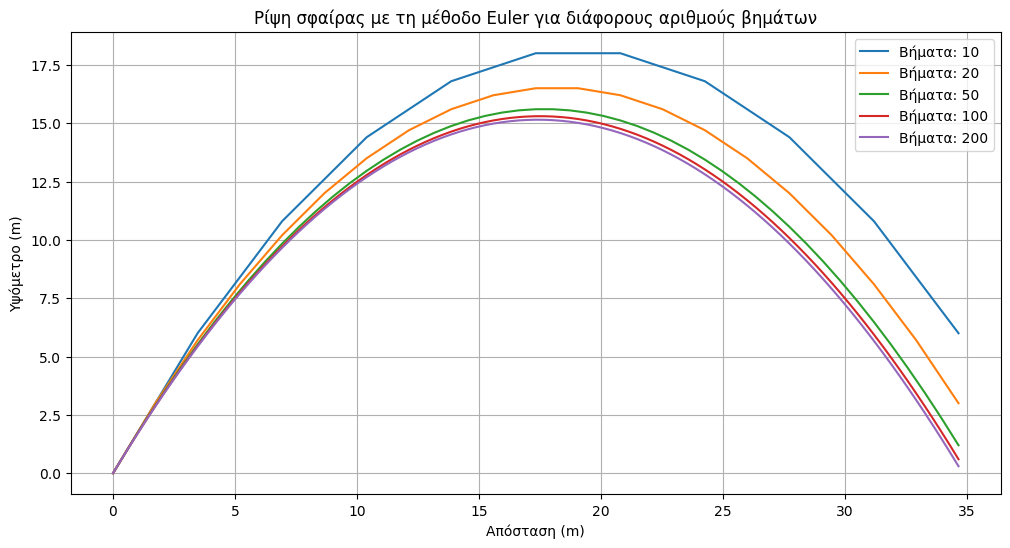

In [428]:
# Αριθμοί βημάτων για διερεύνηση
step_counts_euler = [10, 20, 50, 100, 200]

# Δημιουργία γραφημάτων για τη μέθοδο Euler με διάφορους αριθμούς βημάτων
plt.figure(figsize=(12, 6))

for N in step_counts_euler:
    # Υπολογισμός του χρονικού βήματος βάσει του αριθμού βημάτων
    dt = t_end / N

    # Αρχικές συνθήκες
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    vx = np.zeros(N+1)
    vy = np.zeros(N+1)
    x[0] = 0
    y[0] = 0
    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    # Υπολογισμός των θέσεων και των ταχυτήτων χρησιμοποιώντας τη μέθοδο Euler
    for i in range(N):
        vx[i+1] = vx[i]
        vy[i+1] = vy[i] - g * dt
        x[i+1] = x[i] + vx[i] * dt
        y[i+1] = y[i] + vy[i] * dt
    
    # Σχεδίαση της τροχιάς
    plt.plot(x, y, label=f'Βήματα: {N}')

plt.xlabel('Απόσταση (m)')
plt.ylabel('Υψόμετρο (m)')
plt.title('Ρίψη σφαίρας με τη μέθοδο Euler για διάφορους αριθμούς βημάτων')
plt.legend()
plt.grid(True)
plt.show()



In [429]:
theta = np.pi / 3  
v0 = 20.0  
g = 10.0  
t_end = 2 * v0 * np.sin(theta) / g 

# Μεγέθη βημάτων για δοκιμή
time_steps_euler = [0.1, 0.05, 0.01, 0.005, 0.001]

for dt in time_steps_euler:
    # Υπολογισμός του συνολικού αριθμού βημάτων
    N = int(t_end / dt)
    
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    vx = np.zeros(N+1)
    vy = np.zeros(N+1)
    x[0] = 0
    y[0] = 0
    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    for i in range(N):
        vx[i+1] = vx[i]
        vy[i+1] = vy[i] - g * dt
        x[i+1] = x[i] + vx[i] * dt
        y[i+1] = y[i] + vy[i] * dt

    # Επιλογή 10 τυχαίων βημάτων για εκτύπωση
    indices_to_print = np.linspace(0, N, 10, dtype=int)
    print(f"\nΧρονικό Βήμα: {dt} s")
    for index in indices_to_print:
        print(f"Βήμα {index}: x = {x[index]:.2f} m, y = {y[index]:.2f} m, vx = {vx[index]:.2f} m/s, vy = {vy[index]:.2f} m/s")




Χρονικό Βήμα: 0.1 s
Βήμα 0: x = 0.00 m, y = 0.00 m, vx = 10.00 m/s, vy = 17.32 m/s
Βήμα 3: x = 3.00 m, y = 4.90 m, vx = 10.00 m/s, vy = 14.32 m/s
Βήμα 7: x = 7.00 m, y = 10.02 m, vx = 10.00 m/s, vy = 10.32 m/s
Βήμα 11: x = 11.00 m, y = 13.55 m, vx = 10.00 m/s, vy = 6.32 m/s
Βήμα 15: x = 15.00 m, y = 15.48 m, vx = 10.00 m/s, vy = 2.32 m/s
Βήμα 18: x = 18.00 m, y = 15.88 m, vx = 10.00 m/s, vy = -0.68 m/s
Βήμα 22: x = 22.00 m, y = 15.01 m, vx = 10.00 m/s, vy = -4.68 m/s
Βήμα 26: x = 26.00 m, y = 12.53 m, vx = 10.00 m/s, vy = -8.68 m/s
Βήμα 30: x = 30.00 m, y = 8.46 m, vx = 10.00 m/s, vy = -12.68 m/s
Βήμα 34: x = 34.00 m, y = 2.79 m, vx = 10.00 m/s, vy = -16.68 m/s

Χρονικό Βήμα: 0.05 s
Βήμα 0: x = 0.00 m, y = 0.00 m, vx = 10.00 m/s, vy = 17.32 m/s
Βήμα 7: x = 3.50 m, y = 5.54 m, vx = 10.00 m/s, vy = 13.82 m/s
Βήμα 15: x = 7.50 m, y = 10.37 m, vx = 10.00 m/s, vy = 9.82 m/s
Βήμα 23: x = 11.50 m, y = 13.59 m, vx = 10.00 m/s, vy = 5.82 m/s
Βήμα 30: x = 15.00 m, y = 15.11 m, vx = 10.00 m/s, v

## Runge Kutta 4ης τάξης

Θα λύσουμε το ίδιο πρόβλημα με την RK4.

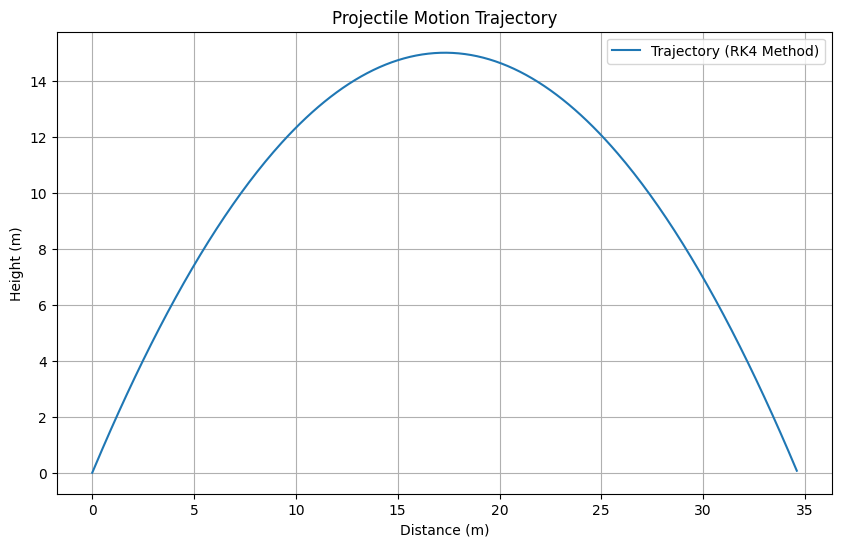

Specific Points:
For x = 4: x = 4.000000000000003, y = 6.128203230275504
For x = 8: x = 7.9999999999999885, y = 10.656406460551011
For x = 12: x = 11.999999999999975, y = 13.584609690826523
For x = 16: x = 15.999999999999961, y = 14.912812921102043
For x = 20: x = 20.000000000000018, y = 14.641016151377562
For x = 24: x = 24.000000000000075, y = 12.769219381653079


In [430]:
import numpy as np
import matplotlib.pyplot as plt

# Συναρτήσεις που περιγράφουν την κίνηση
def dx_dt(vx, vy, t):
    return vx

def dy_dt(vx, vy, t):
    return vy

def dvx_dt(vx, vy, t):
    return 0

def dvy_dt(vx, vy, t):
    return -g

# Μέθοδος Runge-Kutta 4ης τάξης (RK4) για την ρίψη σφαίρας
def rk4_method_for_projectile_motion(t_max, dt, vx0, vy0):
    # Αρχικές συνθήκες
    x, y = 0, 0
    vx, vy = vx0, vy0

    # Αποθήκευση τιμών της τροχιάς
    x_values, y_values = [], []

    for t in np.arange(0, t_max, dt):
        x_values.append(x)
        y_values.append(y)

        if y < 0:  # Τερματισμός όταν η σφαίρα πέσει στο έδαφος
            break

        # Runge-Kutta 4ης τάξης
        k1vx = dt * dvx_dt(vx, vy, t)
        k1vy = dt * dvy_dt(vx, vy, t)
        k1x = dt * dx_dt(vx, vy, t)
        k1y = dt * dy_dt(vx, vy, t)

        k2vx = dt * dvx_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2vy = dt * dvy_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2x = dt * dx_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2y = dt * dy_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)

        k3vx = dt * dvx_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3vy = dt * dvy_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3x = dt * dx_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3y = dt * dy_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)

        k4vx = dt * dvx_dt(vx + k3vx, vy + k3vy, t + dt)
        k4vy = dt * dvy_dt(vx + k3vx, vy + k3vy, t + dt)
        k4x = dt * dx_dt(vx + k3vx, vy + k3vy, t + dt)
        k4y = dt * dy_dt(vx + k3vx, vy + k3vy, t + dt)

        vx += (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6
        vy += (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6
        x += (k1x + 2*k2x + 2*k3x + k4x) / 6
        y += (k1y + 2*k2y + 2*k3y + k4y) / 6

    return x_values, y_values

# Βασικές παράμετροι
v0 = 20  # αρχική ταχύτητα σε m/s
angle = np.pi / 3  # γωνία ρίψης σε ακτίνια
g = 10  # επιτάχυνση της βαρύτητας σε m/s^2

# Αρχικές συνθήκες
x0, y0 = 0, 0
vx0 = v0 * np.cos(angle)
vy0 = v0 * np.sin(angle)

# Χρονικό διάστημα και βήματα
dt = 0.01
t_max = 2 * v0 * np.sin(angle) / g  # Μέγιστος χρόνος πτώσης

# Εφαρμογή της μεθόδου RK4
x_values, y_values = rk4_method_for_projectile_motion(t_max, dt, vx0, vy0)

# Δημιουργία διαγράμματος για την τροχιά
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Trajectory (RK4 Method)')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion Trajectory')
plt.grid(True)
plt.legend()
plt.show()

specific_x_values = [4, 8, 12, 16, 20, 24]

print("Specific Points:")
for x_target in specific_x_values:
    closest_x_index = min(range(len(x_values)), key=lambda i: abs(x_values[i] - x_target))
    print(f"For x = {x_target}: x = {x_values[closest_x_index]}, y = {y_values[closest_x_index]}")


# Διερεύνηση με RK4

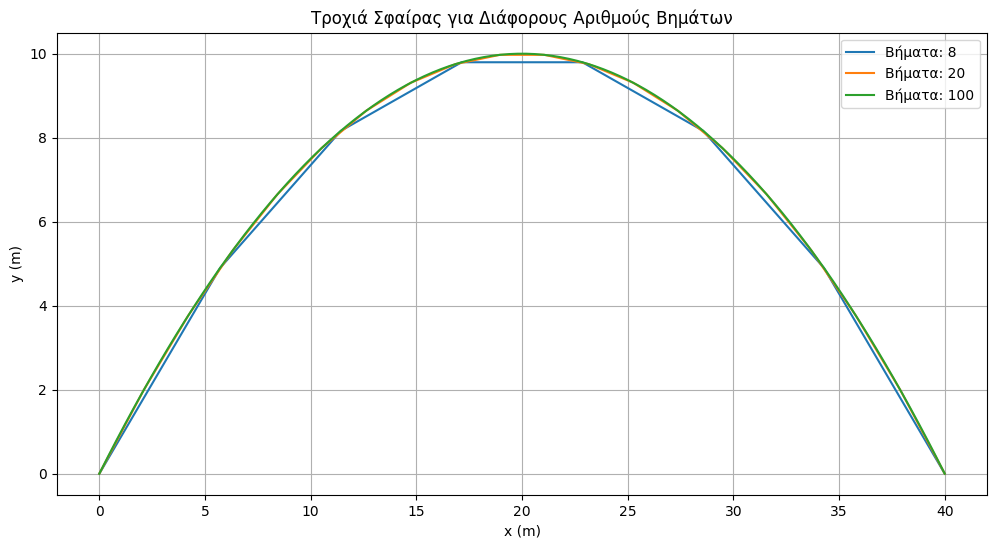

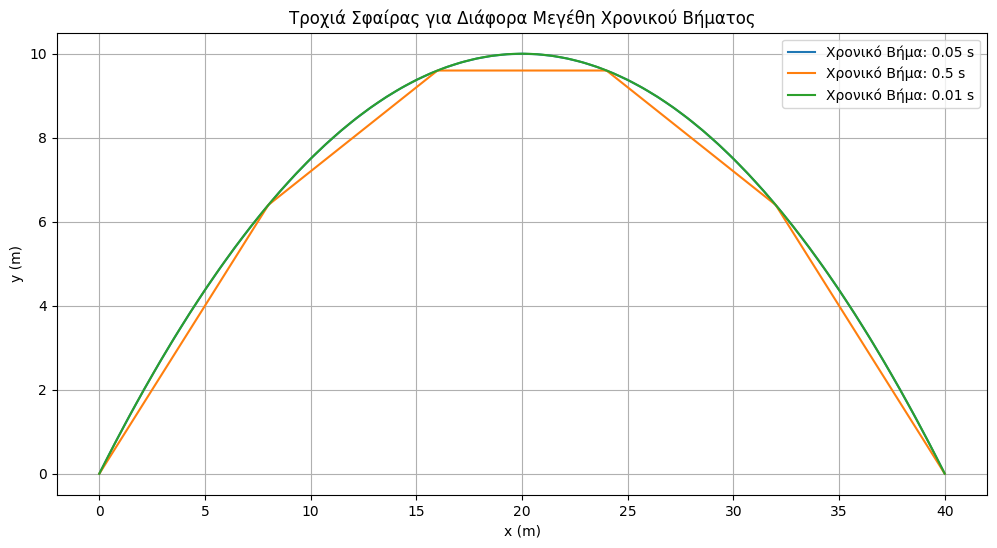

In [431]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Ορισμός της συνάρτησης που περιγράφει την κίνηση της σφαίρας
def projectile_motion(t, y):
    x, vx, y, vy = y
    dxdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -g
    return [dxdt, dvxdt, dydt, dvydt]

# Βασικές παράμετροι
g = 10  # επιτάχυνση της βαρύτητας σε m/s^2
v0 = 20  # αρχική ταχύτητα σε m/s
angle = np.pi / 4  # γωνία ρίψης σε ακτίνια
y0 = [0, v0 * np.cos(angle), 0, v0 * np.sin(angle)]  # αρχικές συνθήκες

# Ορισμός των διαφορετικών αριθμών βημάτων
step_numbers = [8, 20, 100]
solutions = []

for steps in step_numbers:
    t_flight = 2 * y0[3] / g
    t_eval = np.linspace(0, t_flight, steps)
    sol = solve_ivp(projectile_motion, [0, t_flight], y0, t_eval=t_eval, method='RK45')
    solutions.append((steps, sol))

# Δημιουργία γραφήματος για τον αριθμό βημάτων
plt.figure(figsize=(12, 6))

for steps, sol in solutions:
    plt.plot(sol.y[0], sol.y[2], label=f'Βήματα: {steps}')

plt.title('Τροχιά Σφαίρας για Διάφορους Αριθμούς Βημάτων')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

# Ορισμός των διαφορετικών μεγεθών χρονικού βήματος
time_steps = [0.05, 0.5, 0.01]
final_positions_time_step = []

for dt in time_steps:
    t_flight = 2 * y0[3] / g
    steps = int(t_flight / dt) + 1
    t_eval = np.linspace(0, t_flight, steps)
    sol = solve_ivp(projectile_motion, [0, t_flight], y0, t_eval=t_eval, method='RK45')
    final_positions_time_step.append((dt, sol.y[0][-1], sol.y[2][-1]))

# Δημιουργία γραφήματος για το μέγεθος του χρονικού βήματος
plt.figure(figsize=(12, 6))

for dt, x_final, y_final in final_positions_time_step:
    t_flight = 2 * y0[3] / g
    steps = int(t_flight / dt) + 1
    t_eval = np.linspace(0, t_flight, steps)
    sol = solve_ivp(projectile_motion, [0, t_flight], y0, t_eval=t_eval, method='RK45')

    plt.plot(sol.y[0], sol.y[2], label=f'Χρονικό Βήμα: {dt} s')

plt.title('Τροχιά Σφαίρας για Διάφορα Μεγέθη Χρονικού Βήματος')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show() 


In [432]:
print("Τιμές για Διάφορους Αριθμούς Βημάτων:")
for steps, sol in solutions:
    t_final = sol.t[-1]
    x_final = sol.y[0][-1]
    y_final = sol.y[2][-1]
    vx_final = sol.y[1][-1]
    vy_final = sol.y[3][-1]
    print(f"\nΑριθμός Βημάτων: {steps}")
    print(f"Τελικός Χρόνος Πτήσης: {t_final:.2f} s")
    print(f"Τελική Θέση x: {x_final:.2f} m, y: {y_final:.2f} m")
    print(f"Τελική Ταχύτητα vx: {vx_final:.2f} m/s, vy: {vy_final:.2f} m/s")

print("\nΤιμές για Διάφορα Μεγέθη Χρονικού Βήματος:")
for dt, x_final, y_final in final_positions_time_step:
    t_flight = 2 * y0[3] / g
    steps = int(t_flight / dt) + 1
    t_eval = np.linspace(0, t_flight, steps)
    sol = solve_ivp(projectile_motion, [0, t_flight], y0, t_eval=t_eval, method='RK45')
    t_final = sol.t[-1]
    vx_final = sol.y[1][-1]
    vy_final = sol.y[3][-1]
    print(f"\nΧρονικό Βήμα: {dt} s")
    print(f"Τελικός Χρόνος Πτήσης: {t_final:.2f} s")
    print(f"Τελική Θέση x: {x_final:.2f} m, y: {y_final:.2f} m")
    print(f"Τελική Ταχύτητα vx: {vx_final:.2f} m/s, vy: {vy_final:.2f} m/s")



Τιμές για Διάφορους Αριθμούς Βημάτων:

Αριθμός Βημάτων: 8
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s

Αριθμός Βημάτων: 20
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s

Αριθμός Βημάτων: 100
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s

Τιμές για Διάφορα Μεγέθη Χρονικού Βήματος:

Χρονικό Βήμα: 0.05 s
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s

Χρονικό Βήμα: 0.5 s
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s

Χρονικό Βήμα: 0.01 s
Τελικός Χρόνος Πτήσης: 2.83 s
Τελική Θέση x: 40.00 m, y: -0.00 m
Τελική Ταχύτητα vx: 14.14 m/s, vy: -14.14 m/s


## Διαφορά μεταξύ Euler και RK4

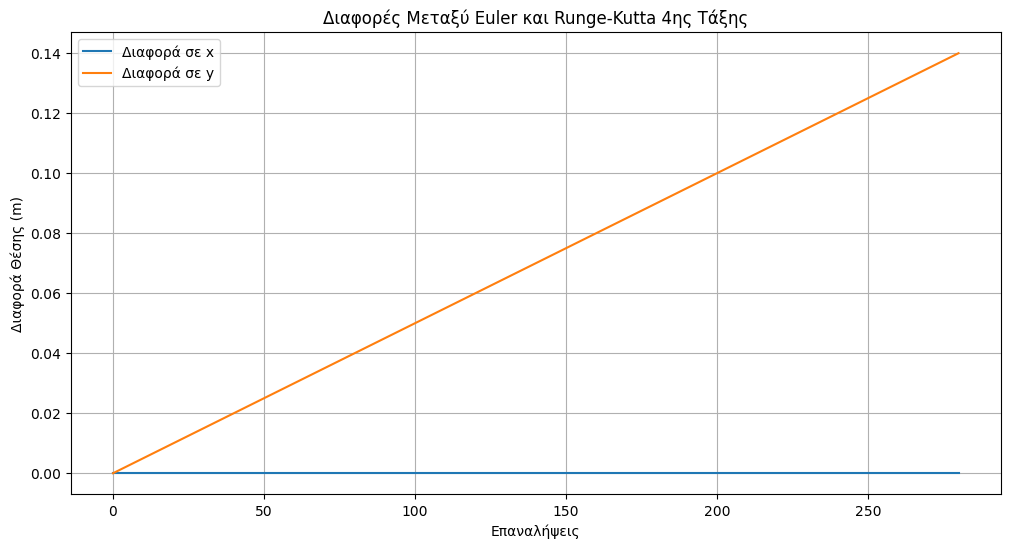

In [452]:
import numpy as np
import matplotlib.pyplot as plt

# Υλοποίηση της μεθόδου Euler
def euler_method(theta, v0, dt, num_steps):
    g = 10.0
    x, y = 0.0, 0.0
    vx, vy = v0 * np.cos(theta), v0 * np.sin(theta)
    x_values, y_values = [x], [y]

    for _ in range(num_steps):
        x += vx * dt
        y += vy * dt
        vy -= g * dt
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Υλοποίηση της μεθόδου Runge-Kutta 4ης τάξης
def runge_kutta_4th_order_corrected(theta, v0, dt, num_steps):
    g = 10.0
    x, y, vx, vy = 0.0, 0.0, v0 * np.cos(theta), v0 * np.sin(theta)
    x_values, y_values = [x], [y]

    for _ in range(num_steps):
        k1vx = 0
        k1vy = -g
        k1x = vx
        k1y = vy

        k2vx = 0
        k2vy = -g
        k2x = vx + k1vx * dt/2
        k2y = vy + k1vy * dt/2

        k3vx = 0
        k3vy = -g
        k3x = vx + k2vx * dt/2
        k3y = vy + k2vy * dt/2

        k4vx = 0
        k4vy = -g
        k4x = vx + k3vx * dt
        k4y = vy + k3vy * dt

        vx += (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6 * dt
        vy += (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6 * dt
        x += (k1x + 2*k2x + 2*k3x + k4x) / 6 * dt
        y += (k1y + 2*k2y + 2*k3y + k4y) / 6 * dt
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Παράμετροι του προβλήματος
theta = np.pi / 3
v0 = 20.0
dt = 0.01
num_steps = 280

# Υπολογισμός των τιμών με τις δύο μεθόδους
x_euler, y_euler = euler_method(theta, v0, dt, num_steps)
x_rk4, y_rk4 = runge_kutta_4th_order_corrected(theta, v0, dt, num_steps)

# Υπολογισμός της διαφοράς των τιμών θέσης στον άξονα x και y
diff_x = np.abs(np.array(x_euler) - np.array(x_rk4))
diff_y = np.abs(np.array(y_euler) - np.array(y_rk4))

# Σχεδίαση των διαφορών
plt.figure(figsize=(12, 6))
plt.plot(diff_x, label='Διαφορά σε x')
plt.plot(diff_y, label='Διαφορά σε y')
plt.xlabel('Επαναλήψεις')
plt.ylabel('Διαφορά Θέσης (m)')
plt.title('Διαφορές Μεταξύ Euler και Runge-Kutta 4ης Τάξης')
plt.legend()
plt.grid(True)
plt.show()


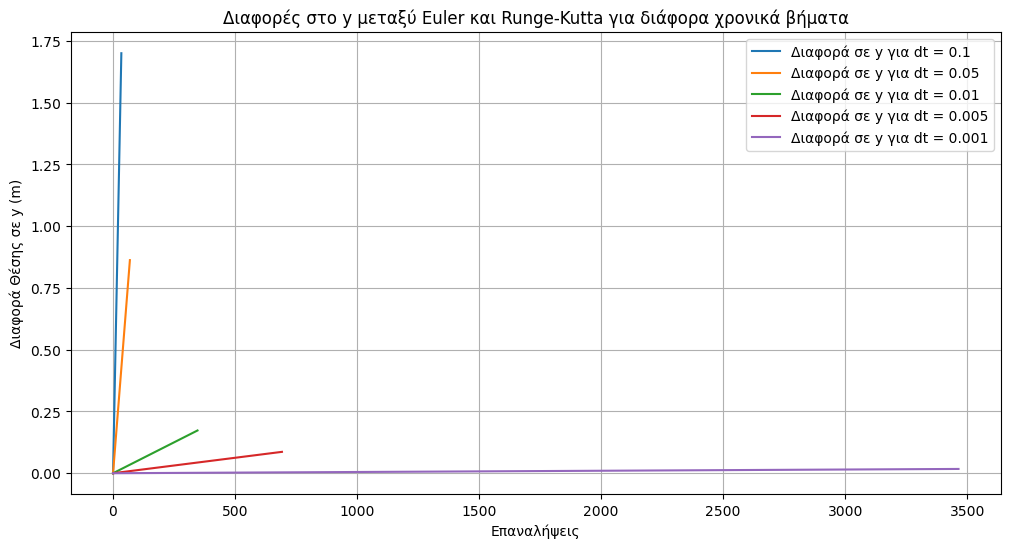

In [454]:
# Ορισμός διαφορετικών χρονικών βημάτων
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Δημιουργία γραφήματος για την διαφορά στον άξονα y για διάφορα χρονικά βήματα
plt.figure(figsize=(12, 6))

for dt in dt_values:
    num_steps = int(t_end / dt)
    x_euler, y_euler = euler_method(theta, v0, dt, num_steps)
    x_rk4, y_rk4 = runge_kutta_4th_order_corrected(theta, v0, dt, num_steps)

    # Υπολογισμός της διαφοράς στον άξονα y
    diff_y = np.abs(np.array(y_euler) - np.array(y_rk4))

    # Σχεδίαση της διαφοράς
    plt.plot(range(num_steps + 1), diff_y, label=f'Διαφορά σε y για dt = {dt}')

plt.xlabel('Επαναλήψεις')
plt.ylabel('Διαφορά Θέσης σε y (m)')
plt.title('Διαφορές στο y μεταξύ Euler και Runge-Kutta για διάφορα χρονικά βήματα')
plt.legend()
plt.grid(True)
plt.show()



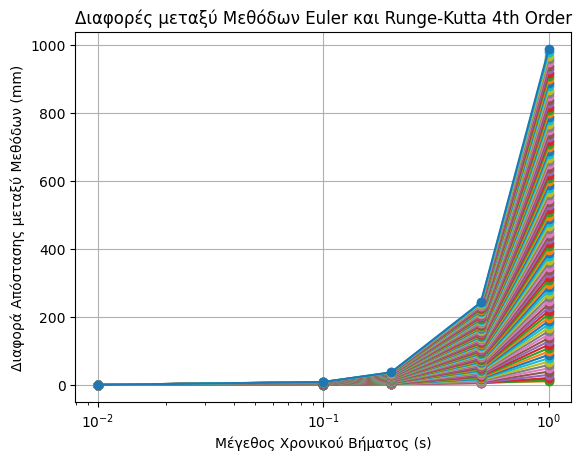

In [433]:


import numpy as np
import matplotlib.pyplot as plt

def euler_method(theta, v0, dt, num_steps):
    g = 10.0  # επιτάχυνση της βαρύτητας
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)

    for i in range(num_steps + 1):
        x[i] = v0x * i * dt
        y[i] = v0y * i * dt - 0.5 * g * (i * dt) ** 2

    return x, y

def runge_kutta_4th_order(theta, v0, dt, num_steps):
    g = 10.0  # επιτάχυνση της βαρύτητας
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)

    for i in range(num_steps + 1):
        k1x = v0x
        k1y = v0y - g * i * dt

        k2x = v0x
        k2y = v0y - g * (i + 0.5) * dt

        k3x = v0x
        k3y = v0y - g * (i + 0.5) * dt

        k4x = v0x
        k4y = v0y - g * (i + 1) * dt

        x[i] = x[i-1] + (dt / 6) * (k1x + 2*k2x + 2*k3x + k4x)
        y[i] = y[i-1] + (dt / 6) * (k1y + 2*k2y + 2*k3y + k4y)

    return x, y

def compute_difference(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def plot_method_comparison(dt_values, differences):
    plt.plot(dt_values, differences, marker='o')
    plt.xscale('log')  # Λογαριθμική κλίμακα για το μέγεθος του χρονικού βήματος
    plt.xlabel('Μέγεθος Χρονικού Βήματος (s)')
    plt.ylabel('Διαφορά Απόστασης μεταξύ Μεθόδων (mm)')
    plt.title('Διαφορές μεταξύ Μεθόδων Euler και Runge-Kutta 4th Order')
    plt.grid(True)
    plt.show()

theta = np.pi / 3  # γωνία ρίψης
v0 = 20.0  # αρχική ταχύτητα (m/s)
num_steps = 100  # αριθμός βημάτων

# Πειραματική ανάλυση για διάφορα μεγέθη χρονικού βήματος
dt_values = [0.01,0.1, 0.2, 0.5, 1.0]

differences = []

for dt in dt_values:
    # Υπολογισμός της πορείας χρησιμοποιώντας τη μέθοδο Euler
    x_euler, y_euler = euler_method(theta, v0, dt, num_steps)

    # Υπολογισμός της πορείας χρησιμοποιώντας τη μέθοδο Runge-Kutta 4ης τάξης
    x_rk4, y_rk4 = runge_kutta_4th_order(theta, v0, dt, num_steps)

    # Υπολογισμός της απόστασης μεταξύ των πορειών
    difference = compute_difference(x_euler, y_euler, x_rk4, y_rk4)
    differences.append(difference)

plot_method_comparison(dt_values, differences)



## Σχόλια

Η RK4 είναι καλύτερη της Euler για μεγαλύτερα βήματα. Για μικρότερα και μεγάλο πλήθος επαναλήψεων δεν έχει τόσο σημασία.
Γενικά βλέπουμε ότι όσο μειώνει το χρονικό βήμα και αυξάνουμε το πλήθος τους τόσο καλύτερα για την ακρίβεια της λύσης. 

## Εύρεση βέλτιστης γωνίας-περίπτωση χωρίς αντίσταση αέρα. 

Γνωρίζουμε ότι αυτή είναι $\frac{π}{4}$, όμως θα εξετάσουμε για διάφορες γωνίες τι προκύπτει. 


In [434]:
import numpy as np
import matplotlib.pyplot as plt

# Συναρτήσεις που περιγράφουν την κίνηση
def dx_dt(vx, vy, t):
    return vx

def dy_dt(vx, vy, t):
    return vy

def dvx_dt(vx, vy, t):
    return 0

def dvy_dt(vx, vy, t):
    return -g

# Μέθοδος Runge-Kutta 4ης τάξης (RK4) για την ρίψη σφαίρας
def rk4_method_for_projectile_motion(t_max, dt, vx0, vy0):
    # Αρχικές συνθήκες
    x, y = 0, 0
    vx, vy = vx0, vy0

    # Αποθήκευση τιμών της τροχιάς
    x_values, y_values = [], []

    for t in np.arange(0, t_max, dt):
        x_values.append(x)
        y_values.append(y)

        if y < 0:  # Τερματισμός όταν η σφαίρα πέσει στο έδαφος
            break

        # Runge-Kutta 4ης τάξης
        k1vx = dt * dvx_dt(vx, vy, t)
        k1vy = dt * dvy_dt(vx, vy, t)
        k1x = dt * dx_dt(vx, vy, t)
        k1y = dt * dy_dt(vx, vy, t)

        k2vx = dt * dvx_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2vy = dt * dvy_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2x = dt * dx_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)
        k2y = dt * dy_dt(vx + k1vx/2, vy + k1vy/2, t + dt/2)

        k3vx = dt * dvx_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3vy = dt * dvy_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3x = dt * dx_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)
        k3y = dt * dy_dt(vx + k2vx/2, vy + k2vy/2, t + dt/2)

        k4vx = dt * dvx_dt(vx + k3vx, vy + k3vy, t + dt)
        k4vy = dt * dvy_dt(vx + k3vx, vy + k3vy, t + dt)
        k4x = dt * dx_dt(vx + k3vx, vy + k3vy, t + dt)
        k4y = dt * dy_dt(vx + k3vx, vy + k3vy, t + dt)

        vx += (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6
        vy += (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6
        x += (k1x + 2*k2x + 2*k3x + k4x) / 6
        y += (k1y + 2*k2y + 2*k3y + k4y) / 6

    return x_values, y_values

# Βασικές παράμετροι
v0 = 20  # αρχική ταχύτητα σε m/s
angle = np.pi / 3  # γωνία ρίψης σε ακτίνια
g = 10  # επιτάχυνση της βαρύτητας σε m/s^2

# Αρχικές συνθήκες
x0, y0 = 0, 0
vx0 = v0 * np.cos(angle)
vy0 = v0 * np.sin(angle)

# Χρονικό διάστημα και βήματα
dt = 0.01
t_max = 2 * v0 * np.sin(angle) / g  # Μέγιστος χρόνος πτώσης

# Εφαρμογή της μεθόδου RK4
x_values, y_values = rk4_method_for_projectile_motion(t_max, dt, vx0, vy0)

# Δημιουργία διαγράμματος για την τροχιά
#plt.figure(figsize=(10, 6))
#plt.plot(x_values, y_values, label='Trajectory (RK4 Method)')
#plt.xlabel('Distance (m)')
#plt.ylabel('Height (m)')
#plt.title('Projectile Motion Trajectory')
#plt.grid(True)
#plt.legend()
#plt.show()


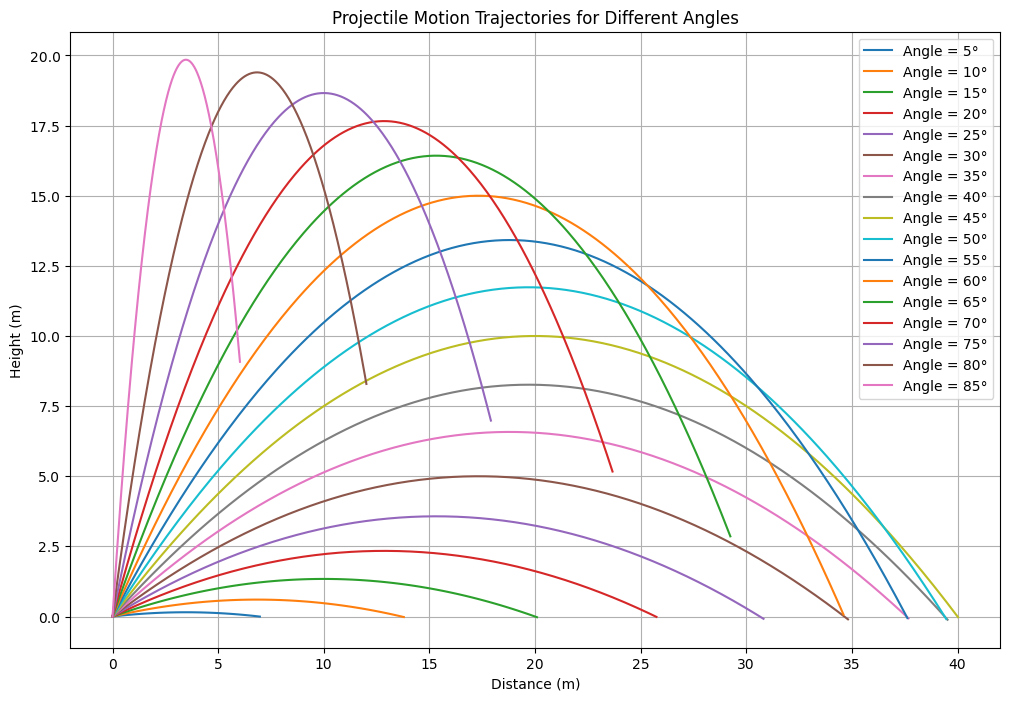

In [435]:


plt.figure(figsize=(12, 8))

# Βρόχος για κάθε γωνία από 5 έως 85 μοίρες
for angle_deg in range(5, 86, 5):
    angle_rad = np.radians(angle_deg)  # Μετατροπή από μοίρες σε ακτίνια
    vx0 = v0 * np.cos(angle_rad)
    vy0 = v0 * np.sin(angle_rad)

    # Εφαρμογή της μεθόδου RK4
    x_values, y_values = rk4_method_for_projectile_motion(t_max, dt, vx0, vy0)

    # Δημιουργία διαγράμματος για κάθε τροχιά
    plt.plot(x_values, y_values, label=f'Angle = {angle_deg}°')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion Trajectories for Different Angles')
plt.grid(True)
plt.legend()
plt.show()



Μπορούμε να δούμε τη συμμετρία της λύσης, όλες οι αποστάσεις έχουν 2 γωνίες(-παραβολικές τροχιές) που τις ικανοποιούν, εκτός από τις 45 μοίρες που είναι και η βέλτιστη λύση. 


Θα τρέξουμε διάφορους αλγόριθμους βελτιστοποίησης για να την βρούμε. Στο παράρτημα έχω και μια με μέθοδο Newton.
Θα δοκιμάσουμε να βρούμε τη λύση με Bayesian optimization και με gradient descent. 

## Gradient descent


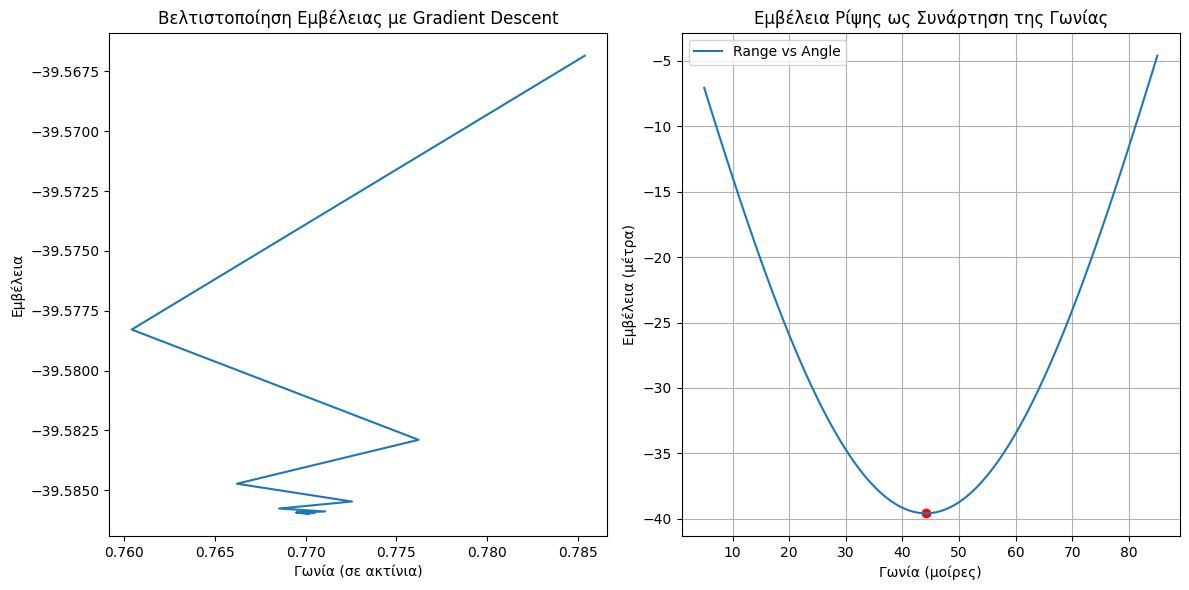

In [436]:
import numpy as np
import matplotlib.pyplot as plt

# Υπολογισμός εμβέλειας με βάση τη γωνία ρίψης
def calculate_range(theta, v0, Cd, A, rho, m, g):
    term1 = (v0**2 * np.sin(2 * theta)) / g
    term2 = (Cd * A * rho) / (2 * m)
    term3 = (v0**3) / (g**2)
    term4 = 1 - np.cos(theta)**2
    return -term1 + term2 * term3 * term4

# Υπολογισμός του gradient
def gradient(theta, v0, Cd, A, rho, m, g):
    h = 1e-5
    df = (calculate_range(theta + h, v0, Cd, A, rho, m, g) - calculate_range(theta, v0, Cd, A, rho, m, g)) / h
    return df

# Εκτέλεση της βαυαρικής βελτιστοποίησης με Gradient Descent
def gradient_descent(theta_init, v0, Cd, A, rho, m, g, learning_rate, num_iterations):
    theta_values = [theta_init]
    for _ in range(num_iterations):
        theta_init = theta_init - learning_rate * gradient(theta_init, v0, Cd, A, rho, m, g)
        theta_values.append(theta_init)
    return theta_values

# Δεδομένα
v0 = 20.0  # αρχική ταχύτητα σε m/s
Cd = 0.5  # συντελεστής αεροδυναμικής τριβής
A = 0.01  # επιφάνεια της σφαίρας σε m^2
rho = 1.2  # πυκνότητα του αέρα σε kg/m^3
m = 0.1  # μάζα της σφαίρας σε kg
g = 9.8  # επιτάχυνση της βαρύτητας σε m/s^2

# Παράμετροι Gradient Descent
learning_rate = 0.01
num_iterations = 100

# Αρχική γωνία
theta_init = 45.0 * np.pi / 180.0  # Σε ακτίνια

# Εκτέλεση Gradient Descent
theta_values = gradient_descent(theta_init, v0, Cd, A, rho, m, g, learning_rate, num_iterations)

# Υπολογισμός εμβέλειας για κάθε γωνία
range_values = [calculate_range(theta, v0, Cd, A, rho, m, g) for theta in theta_values]

# Δημιουργία διαγράμματος για την εμβέλεια σε σχέση με τη γωνία
angles_deg = np.arange(5, 86, 1)  # Γωνίες από 5 έως 85 μοίρες
ranges = [calculate_range(np.radians(angle), v0, Cd, A, rho, m, g) for angle in angles_deg]

# Εμφάνιση αποτελεσμάτων
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(theta_values, range_values)
plt.xlabel('Γωνία (σε ακτίνια)')
plt.ylabel('Εμβέλεια')
plt.title('Βελτιστοποίηση Εμβέλειας με Gradient Descent')

plt.subplot(1, 2, 2)
plt.plot(angles_deg, ranges, label='Range vs Angle')
plt.scatter([np.degrees(theta_values[-1])], [range_values[-1]], color='red')  # Επισημάνετε την βέλτιστη γωνία
plt.xlabel('Γωνία (μοίρες)')
plt.ylabel('Εμβέλεια (μέτρα)')
plt.title('Εμβέλεια Ρίψης ως Συνάρτηση της Γωνίας')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Η μέθοδος του Gradient Descent εδώ γίνεται με short-steps. Έχει ενδιαφέρον το πόσο γρήγορα συγκλίνει στη λύση με τo πόσο μεγάλα βήματα και πόσο καλή ακρίβεια δίνει. Εδώ μέσα 100 επαναλήψεις (μεταβλητή num_iterations) βρίσκει λύση χωρίς αστάθεια ή υπέρβαση της λύσης.

Αν δοκιμάσουμε και μεγαλύτερο βήμα και λίγες επαναλήψεις πάλι μπορεί να έχουμε λύση. Τα μεγάλα βήματα γενικά έχουν ταχύτερη σύγκλιση αλλά μπορεί να δώσουν κακό αποτέλεσμα.

1. https://www.quantamagazine.org/risky-giant-steps-can-solve-optimization-problems-faster-20230811/
2. Benjamin Grimmer, Provably Faster Gradient Descent via Long Steps (2023) (https://arxiv.org/abs/2307.06324)


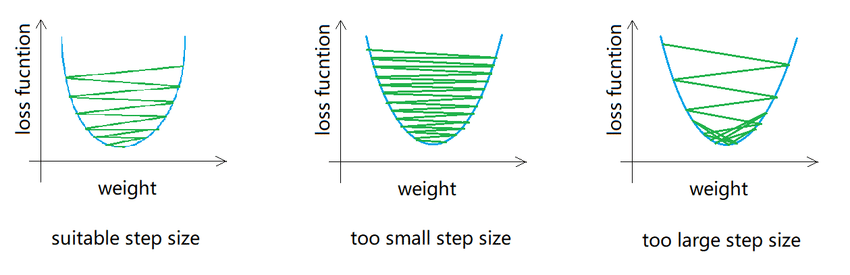


## Μπεϋζιανή βελτιστοποίηση

Στο παράρτημα έχω και μια ακόμη μέθοδο (απόπειρα περισσότερο) με χρήση Μπεϋζιανής βελτιστοποίησης$^{1}$

Αυτό μπορεί να γίνει με κάποια βιβλιοθήκη όπως scikit-optimize
import numpy as np
import matplotlib.pyplot as plt

Συγκεκριμένα το πακέτο skopt
https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html
(Αν δε τρέχει θέλει !pip install scikit-optimize)

*Επειδή δε δούλεψε αυτό τελικά το έτρεξα με την scipy.optimize
https://docs.scipy.org/doc/scipy/reference/optimize.html

Εδώ έχει ενδιαφέρον ότι η αρχική τιμή που του βάζω για να ψάξει είναι π/3. Βρίσκει την λύση με πολύ καλή ακρίβεια. 

## Άλλες αναφορές

[1] http://hdl.handle.net/10889/14874

In [437]:
import numpy as np
from scipy.optimize import minimize

# Συνάρτηση για τον υπολογισμό της εμβέλειας σε μια δεδομένη γωνία ρίψης
def calculate_range(theta):
    v0 = 20.0  # αρχική ταχύτητα σε m/s
    g = 10.0  # επιτάχυνση της βαρύτητας σε m/s^2
    return (v0 ** 2) * np.sin(2 * theta) / g

# Συνάρτηση που πρέπει να ελαχιστοποιηθεί
def objective_function(theta):
    return -calculate_range(theta)

# Αρχική εκτίμηση για τη γωνία ρίψης
initial_guess = np.pi / 3  # Π.χ., αρχική εκτίμηση γωνία στα π/3

# Περιορισμοί για τη γωνία ρίψης (0 έως π/2)
constraints = {'type': 'ineq', 'fun': lambda theta: np.pi / 2 - theta}

# Εκτέλεση της βαυαρικής βελτιστοποίησης
result = minimize(objective_function, initial_guess, constraints=[constraints])

# Εκτύπωση της βέλτιστης γωνίας ρίψης και της μέγιστης εμβέλειας
optimal_theta = result.x[0]
max_range = -result.fun
print(f"Βέλτιστη γωνία ρίψης (σε μοίρες): {np.degrees(optimal_theta)}")
print(f"Μέγιστη εμβέλεια (σε μέτρα): {max_range}")


Βέλτιστη γωνία ρίψης (σε μοίρες): 44.996881020557375
Μέγιστη εμβέλεια (σε μέτρα): 39.99999976293374


## Αντίσταση Αέρα. 

Για την αντίσταση του αέρα έχουμε ένα πιο σύνθετο σύστημα. Θα λύσουμε πάλι και με τις δύο μεθόδους (Euler & RK4). 

Πρώτα με Euler. 

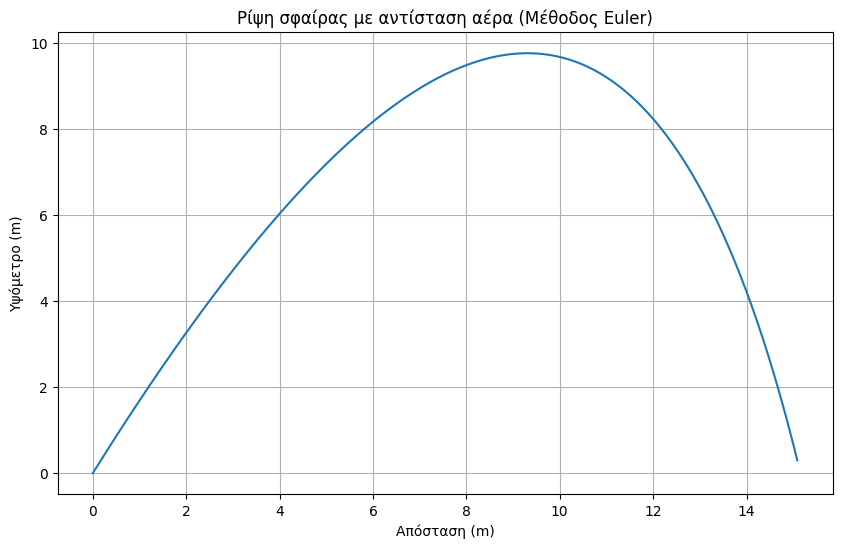

In [438]:

import numpy as np
import matplotlib.pyplot as plt

# Συναρτήσεις για τον υπολογισμό των παραγώγων
def f_x(vx):
    return vx

def f_y(vy):
    return vy

def f_vx(vx):
    return -0.5 * vx

def f_vy(vy):
    return -g - 0.5 * vy

# Σταθερές
g = 10.0  # επιτάχυνση της βαρύτητας σε m/s^2
v0 = 20.0  # αρχική ταχύτητα σε m/s
theta = np.pi / 3.0  # γωνία ρίψης σε ακτίνια

# Αρχικές συνθήκες
x0 = 0.0
y0 = 0.0
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

# Παράμετροι Euler
dt = 0.01  # βήμα χρόνου
num_steps = 280  # συνολικός αριθμός βημάτων

# Αρχικοποίηση λιστών για τα δεδομένα
x_values = [x0]
y_values = [y0]

# Εκτέλεση μεθόδου Euler
for i in range(num_steps):
    x0 = x0 + dt * f_x(vx0)
    y0 = y0 + dt * f_y(vy0)
    vx0 = vx0 + dt * f_vx(vx0)
    vy0 = vy0 + dt * f_vy(vy0)

    x_values.append(x0)
    y_values.append(y0)

# Σχεδίαση της τροχιάς
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('Απόσταση (m)')
plt.ylabel('Υψόμετρο (m)')
plt.title('Ρίψη σφαίρας με αντίσταση αέρα (Μέθοδος Euler)')
plt.grid(True)

plt.show()


Θα λύσουμε και με RK4. 

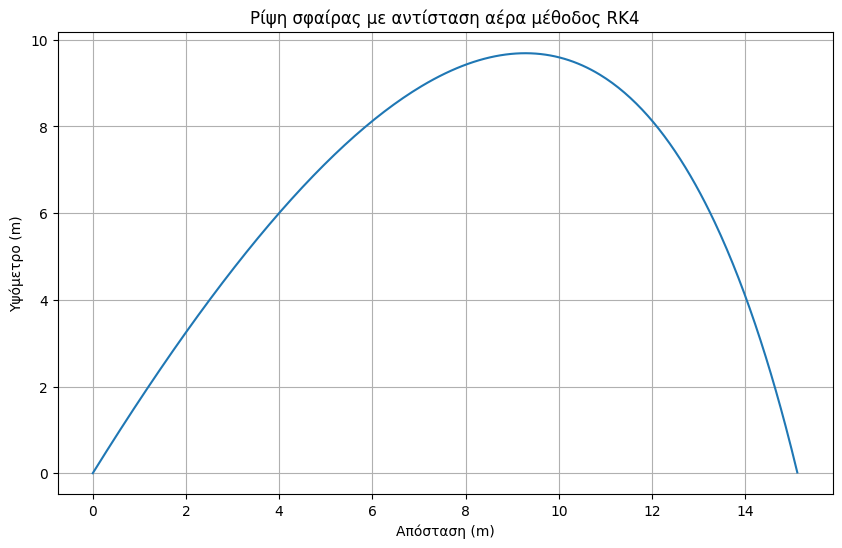

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Συναρτήσεις για τον υπολογισμό των παραγώγων
def f_x(vx):
    return vx

def f_y(vy):
    return vy

def f_vx(vx):
    return -0.5 * vx

def f_vy(vy):
    return -g - 0.5 * vy

# Σταθερές
g = 10.0  # επιτάχυνση της βαρύτητας σε m/s^2
v0 = 20.0  # αρχική ταχύτητα σε m/s
theta = np.pi / 3.0  # γωνία ρίψης σε ακτίνια

# Αρχικές συνθήκες
x0 = 0.0
y0 = 0.0
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

# Παράμετροι Runge-Kutta
dt = 0.01  # βήμα χρόνου
num_steps = 282 #συνολικός αριθμός βημάτων

# Αρχικοποίηση λιστών για τα δεδομένα
x_values = [x0]
y_values = [y0]

# Εκτέλεση Runge-Kutta 4ης τάξης
for i in range(num_steps):
    k1x = dt * f_x(vx0)
    k1y = dt * f_y(vy0)
    k1vx = dt * f_vx(vx0)
    k1vy = dt * f_vy(vy0)

    k2x = dt * f_x(vx0 + 0.5 * k1vx)
    k2y = dt * f_y(vy0 + 0.5 * k1vy)
    k2vx = dt * f_vx(vx0 + 0.5 * k1vx)
    k2vy = dt * f_vy(vy0 + 0.5 * k1vy)

    k3x = dt * f_x(vx0 + 0.5 * k2vx)
    k3y = dt * f_y(vy0 + 0.5 * k2vy)
    k3vx = dt * f_vx(vx0 + 0.5 * k2vx)
    k3vy = dt * f_vy(vy0 + 0.5 * k2vy)

    k4x = dt * f_x(vx0 + k3vx)
    k4y = dt * f_y(vy0 + k3vy)
    k4vx = dt * f_vx(vx0 + k3vx)
    k4vy = dt * f_vy(vy0 + k3vy)

    x0 = x0 + (1/6) * (k1x + 2*k2x + 2*k3x + k4x)
    y0 = y0 + (1/6) * (k1y + 2*k2y + 2*k3y + k4y)
    vx0 = vx0 + (1/6) * (k1vx + 2*k2vx + 2*k3vx + k4vx)
    vy0 = vy0 + (1/6) * (k1vy + 2*k2vy + 2*k3vy + k4vy)

    x_values.append(x0)
    y_values.append(y0)

# Σχεδίαση της τροχιάς
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('Απόσταση (m)')
plt.ylabel('Υψόμετρο (m)')
plt.title('Ρίψη σφαίρας με αντίσταση αέρα μέθοδος RK4')
plt.grid(True)
plt.show()



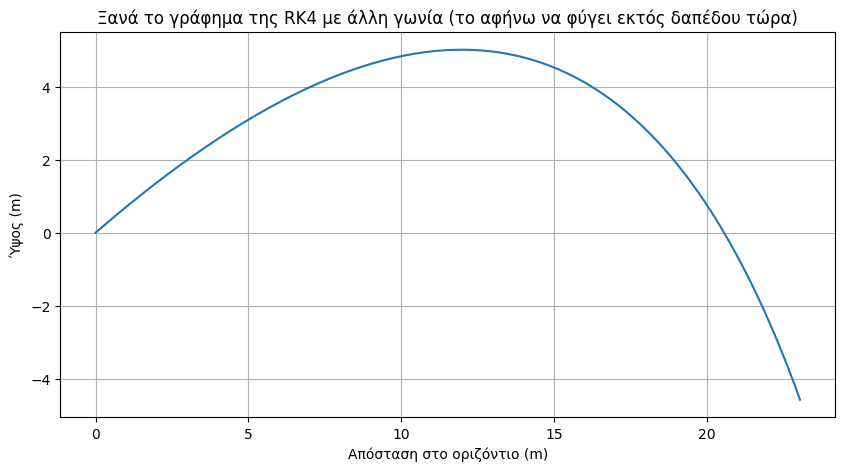

In [440]:
import numpy as np
import matplotlib.pyplot as plt

g = 10
v0 = 20  
angle = np.pi / 5  

v_x0 = v0 * np.cos(angle)
v_y0 = v0 * np.sin(angle)
x0 = 0
y0 = 0

t0 = 0
tf = 2.5  
dt = 0.01 

def derivatives(state, t):
    x, y, v_x, v_y = state
    dv_x_dt = -0.5 * v_x
    dv_y_dt = -g - 0.5 * v_y
    dx_dt = v_x
    dy_dt = v_y
    return np.array([dx_dt, dy_dt, dv_x_dt, dv_y_dt])

def runge_kutta4(derivatives, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        k1 = dt * derivatives(y[i - 1], t[i - 1])
        k2 = dt * derivatives(y[i - 1] + 0.5 * k1, t[i - 1] + 0.5 * dt)
        k3 = dt * derivatives(y[i - 1] + 0.5 * k2, t[i - 1] + 0.5 * dt)
        k4 = dt * derivatives(y[i - 1] + k3, t[i - 1] + dt)
        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, y

initial_state = [x0, y0, v_x0, v_y0]

t, trajectory = runge_kutta4(derivatives, initial_state, t0, tf, dt)

x = trajectory[:, 0]
y = trajectory[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title("Ξανά το γράφημα της RK4 με άλλη γωνία (το αφήνω να φύγει εκτός δαπέδου τώρα)")
plt.xlabel("Απόσταση στο οριζόντιο (m)")
plt.ylabel("Ύψος (m)")
plt.grid(True)
plt.show()


## Διερεύνηση γωνίας με πειράματα διαφόρων γωνιών.

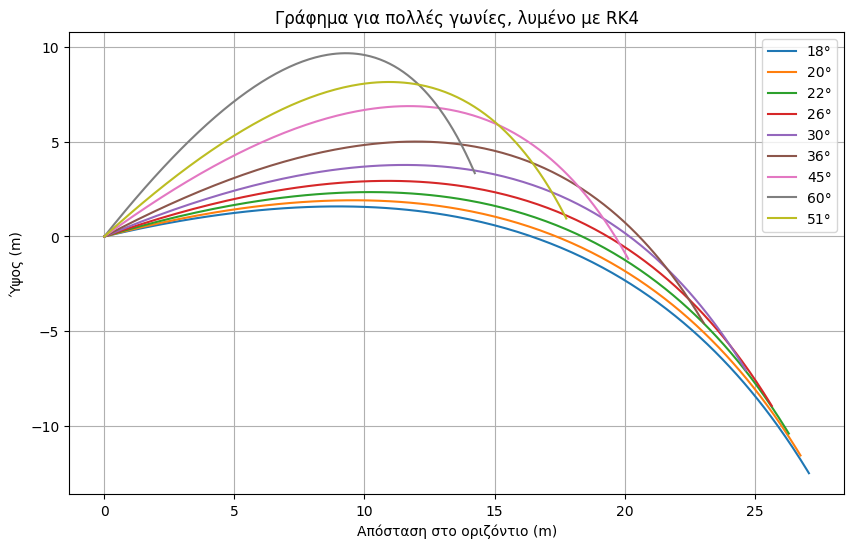

In [441]:
# Ορισμός διαφόρων γωνιών ρίψης σε ραδιάνια
angles = [np.pi/10,np.pi/9,np.pi/8,np.pi/7,np.pi/6,np.pi/5, np.pi/4, np.pi/3, np.pi/3.5]

# Δημιουργία ενός γραφήματος για τις τροχιές
plt.figure(figsize=(10, 6))

for angle in angles:
    # Αρχικές ταχύτητες βάσει της γωνίας
    v_x0 = v0 * np.cos(angle)
    v_y0 = v0 * np.sin(angle)

    # Αρχική κατάσταση για την τρέχουσα γωνία
    initial_state = [x0, y0, v_x0, v_y0]

    # Υπολογισμός της τροχιάς για την τρέχουσα γωνία
    t, trajectory = runge_kutta4(derivatives, initial_state, t0, tf, dt)

    # Σχεδίαση της τροχιάς
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=f"{np.degrees(angle):.0f}°")

plt.title("Γράφημα για πολλές γωνίες, λυμένο με RK4")
plt.xlabel("Απόσταση στο οριζόντιο (m)")
plt.ylabel("Ύψος (m)")
plt.legend()
plt.grid(True)
plt.show()



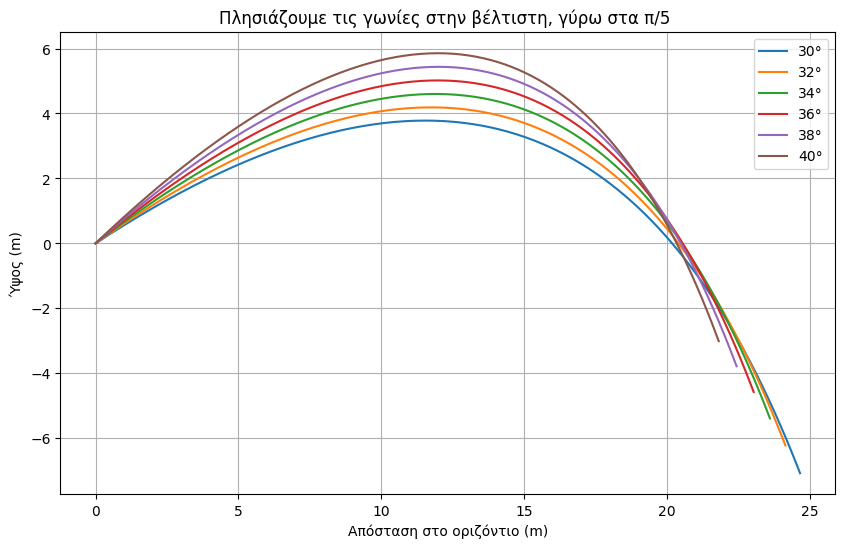

In [442]:
# Ορισμός διαφόρων γωνιών ρίψης σε ραδιάνια
angles = [0.5235987755982988,
 0.5585053606381855,
 0.5934119456780721,
 0.6283185307179586,
 0.6632251157578453,
 0.6981317007977318]

# Δημιουργία ενός γραφήματος για τις τροχιές
plt.figure(figsize=(10, 6))

for angle in angles:
    # Αρχικές ταχύτητες βάσει της γωνίας
    v_x0 = v0 * np.cos(angle)
    v_y0 = v0 * np.sin(angle)

    # Αρχική κατάσταση για την τρέχουσα γωνία
    initial_state = [x0, y0, v_x0, v_y0]

    # Υπολογισμός της τροχιάς για την τρέχουσα γωνία
    t, trajectory = runge_kutta4(derivatives, initial_state, t0, tf, dt)

    # Σχεδίαση της τροχιάς
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=f"{np.degrees(angle):.0f}°")

plt.title("Πλησιάζουμε τις γωνίες στην βέλτιστη, γύρω στα π/5 ")
plt.xlabel("Απόσταση στο οριζόντιο (m)")
plt.ylabel("Ύψος (m)")
plt.legend()
plt.grid(True)
plt.show()


## Αριθμητική εύρεση γωνίας στην περίπτωση της αντίστασης αέρα. 

Αντί για δοκιμές, που βρήκαμε πως είναι γύρω στις $36^{o}$ μοίρες, μπορεί να λυθεί αριθμητικά και να βρεθεί ακριβώς. Δεν είναι τόσο εύκολο με πριν αλλά γίνεται με αρ.ολοκλήρωση των εξισέων και βελτιστοποίηση. Βλ. συνάρτηση "odeint".   
1. https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations
2. https://github.com/APMonitor/pdc/blob/master/Solve_ODEs_with_scipy.ipynb

Παρακάτω βρίσκουμε μέγιστη εμβέλεια και γωνία. 

In [443]:
def horizontal_distance_to_ground(w):
    # Αρχικές συνθήκες
    vx0 = v0 * np.cos(w)
    vy0 = v0 * np.sin(w)
    v0_vec = [vx0, vy0]

    # Χρόνος ολοκλήρωσης
    t = np.linspace(0, 5, 500)

    # Αριθμητική ολοκλήρωση των εξισώσεων κίνησης
    v = odeint(model, v0_vec, t, args=(w,))

    # Υπολογισμός της οριζόντιας και κατακόρυφης θέσης
    x = np.cumsum(v[:,0]) * (t[1] - t[0])
    y = np.cumsum(v[:,1]) * (t[1] - t[0])

    # Εύρεση της οριζόντιας απόστασης όταν y φτάσει στο 0
    x_to_ground = x[y >= 0][-1]
    return x_to_ground

# Βελτιστοποίηση για την εύρεση της βέλτιστης γωνίας w
result_to_ground = minimize_scalar(lambda w: -horizontal_distance_to_ground(w), bounds=(0, np.pi/2), method='bounded')

best_angle_to_ground = result_to_ground.x
best_angle_degrees_to_ground = np.degrees(best_angle_to_ground)
best_distance_to_ground = horizontal_distance_to_ground(best_angle_to_ground)

best_angle_degrees_to_ground, best_distance_to_ground



(35.404546918342035, 20.68494091856766)

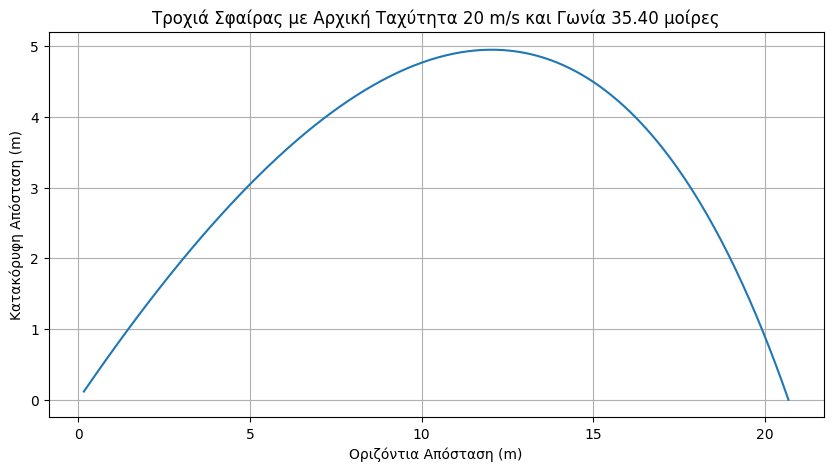

In [444]:
# Υπολογισμός της τροχιάς για τη βέλτιστη γωνία που μεγιστοποιεί την απόσταση μέχρι το έδαφος
x_to_ground_plot, y_to_ground_plot = trajectory_to_ground(best_angle_to_ground)

# Δημιουργία του plot
plt.figure(figsize=(10, 5))
plt.plot(x_to_ground_plot, y_to_ground_plot)
plt.title(f"Τροχιά Σφαίρας με Αρχική Ταχύτητα 20 m/s και Γωνία {best_angle_degrees_to_ground:.2f} μοίρες")
plt.xlabel("Οριζόντια Απόσταση (m)")
plt.ylabel("Κατακόρυφη Απόσταση (m)")
plt.grid(True)
plt.show()


# Άσκηση $5^{η}$



Για να λύσουμε την $x''-\epsilon x'(1-x'^{2})+x=0$ με $x(0)=0$, $x'(0)=0.7$. 

Κάνουμε τον παρακάτω μετασχηματισμό και παίρνουμε το σύστημα εξισώσεων πρώτης τάξης, 

$$\frac{dx}{dt} = y$$

$$\frac{dy}{dt} = \epsilon y(1 - y^2) - x$$


Τώρα αρκεί να λύσουμε το σύστημα για δεδομένες αρχικές συνθήκες και σταθερές

Συγκεκριμένα $\epsilon=0.01$, για τους χρόνους $0\leq t \leq 10$ και με ακρίβεια $Ο(10^{-6})$


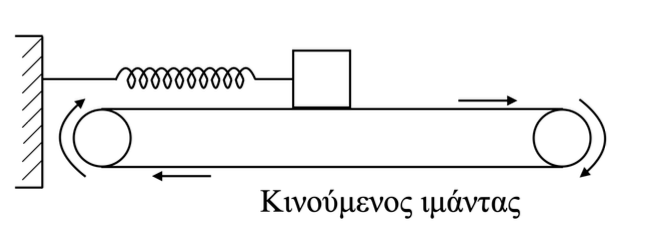

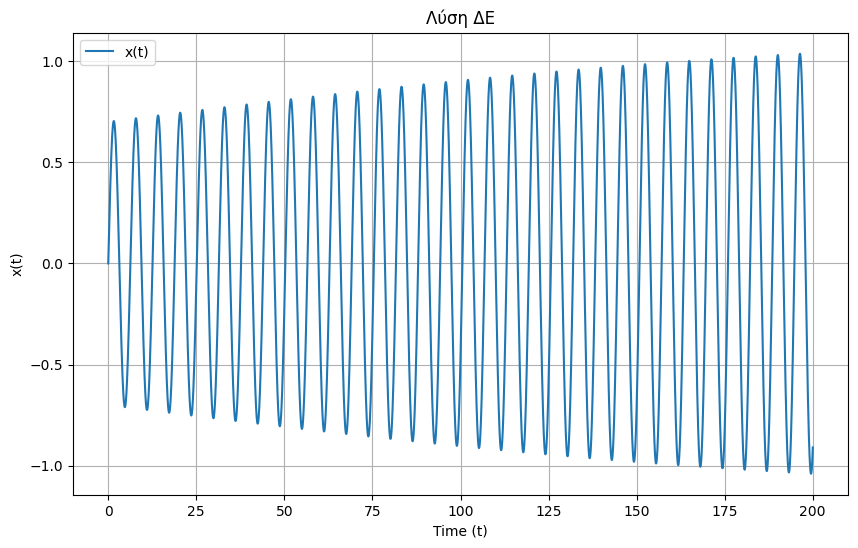

array([ 0.      ,  0.590728,  0.640694,  0.099753, -0.536275, -0.68198 ,
       -0.199376,  0.469866,  0.710111,  0.296809, -0.392643, -0.724267,
       -0.389998,  0.305991,  0.723907,  0.476935, -0.211517, -0.708783,
       -0.555708,  0.111017,  0.678948,  0.624541, -0.00645 , -0.634762,
       -0.681834, -0.100105,  0.576886,  0.726206,  0.206486, -0.506273,
       -0.756522, -0.310495,  0.424155,  0.771926,  0.409943, -0.332022,
       -0.771859, -0.502696,  0.231595,  0.756078,  0.586724, -0.124796,
       -0.724658, -0.660147,  0.013714,  0.678003,  0.721279,  0.099438,
       -0.616834, -0.768667, -0.212364,  0.54218 ,  0.801125,  0.322731,
       -0.455364, -0.817764, -0.428222,  0.357978,  0.818015,  0.526583,
       -0.251854, -0.801639, -0.615674,  0.139036,  0.768742,  0.693519,
       -0.021737, -0.71977 , -0.758349, -0.097701,  0.655503,  0.808649,
        0.216855, -0.577049, -0.843187, -0.333266,  0.485816,  0.861046,
        0.444497, -0.383494, -0.86165 , -0.548181, 

In [445]:
def rk4_system_for_nonlinear_eq(dy_dt, dx_dt, t0, y0, x0, t_max, dt):
    times = np.arange(t0, t_max + dt, dt)
    y_values = np.zeros(len(times))
    x_values = np.zeros(len(times))
    y_values[0], x_values[0] = y0, x0

    for i in range(1, len(times)):
        t = times[i-1]
        y = y_values[i-1]
        x = x_values[i-1]

        ky1 = dt * dy_dt(y, x, t)
        kx1 = dt * dx_dt(y, x, t)

        ky2 = dt * dy_dt(y + ky1/2, x + kx1/2, t + dt/2)
        kx2 = dt * dx_dt(y + ky1/2, x + kx1/2, t + dt/2)

        ky3 = dt * dy_dt(y + ky2/2, x + kx2/2, t + dt/2)
        kx3 = dt * dx_dt(y + ky2/2, x + kx2/2, t + dt/2)

        ky4 = dt * dy_dt(y + ky3, x + kx3, t + dt)
        kx4 = dt * dx_dt(y + ky3, x + kx3, t + dt)

        y_values[i] = y + (ky1 + 2*ky2 + 2*ky3 + ky4) / 6
        x_values[i] = x + (kx1 + 2*kx2 + 2*kx3 + kx4) / 6

    return times, x_values, y_values

# Ορισμός των διαφορικών εξισώσεων
def dy_dt(y, x, t):
    return 0.01 * y * (1 - y**2) - x

def dx_dt(y, x, t):
    return y

# Αρχικές συνθήκες
y0 = 0.7  # x'(0)
x0 = 0    # x(0)
t0 = 0
t_max = 200
dt = 0.01

# Υλοποίηση της μεθόδου RK4
times, x_values, y_values = rk4_system_for_nonlinear_eq(dy_dt, dx_dt, t0, y0, x0, t_max, dt)

# Δημιουργία διαγράμματος
plt.figure(figsize=(10, 6))
plt.plot(times, x_values, label='x(t)')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Λύση ΔΕ')
plt.grid(True)
plt.legend()
plt.show()

# Εκτύπωση μερικών τιμών της x(t) με ακρίβεια 10^-6
sampled_x_values = x_values[::100]  # Δείγμα κάθε 100 βημάτων
np.set_printoptions(precision=6, suppress=True)  # Ρύθμιση της ακρίβειας εκτύπωσης
sampled_x_values


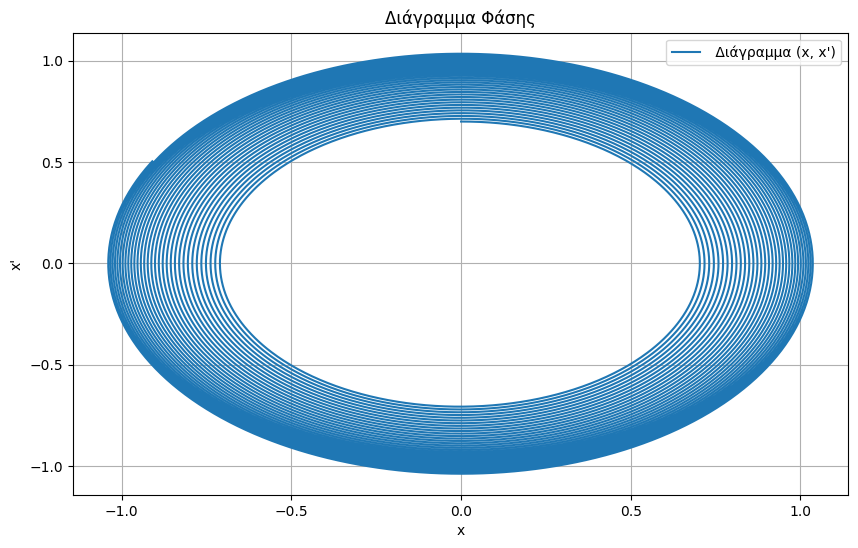

In [446]:
# Δημιουργία διαγράμματος για το σύστημα (x, x')
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=" Διάγραμμα (x, x')")
plt.xlabel('x')
plt.ylabel("x'")
plt.title('Διάγραμμα Φάσης')
plt.grid(True)
plt.legend()
plt.show()



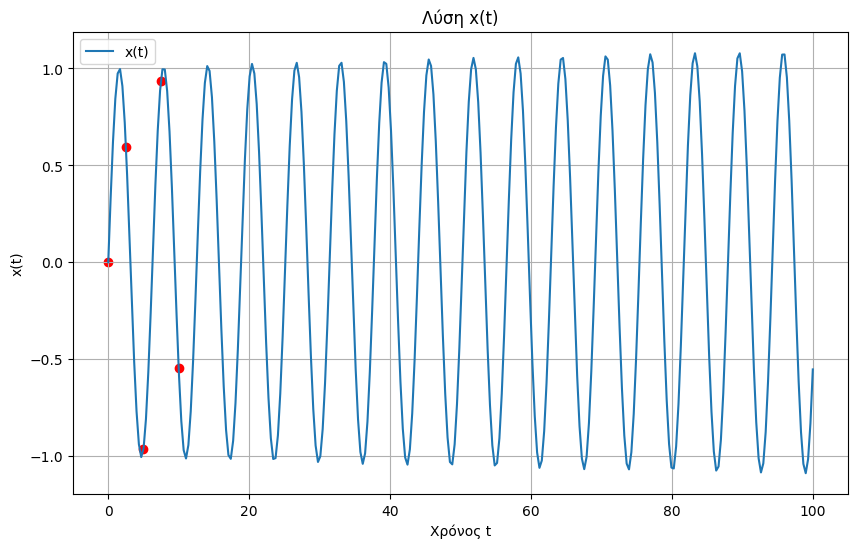

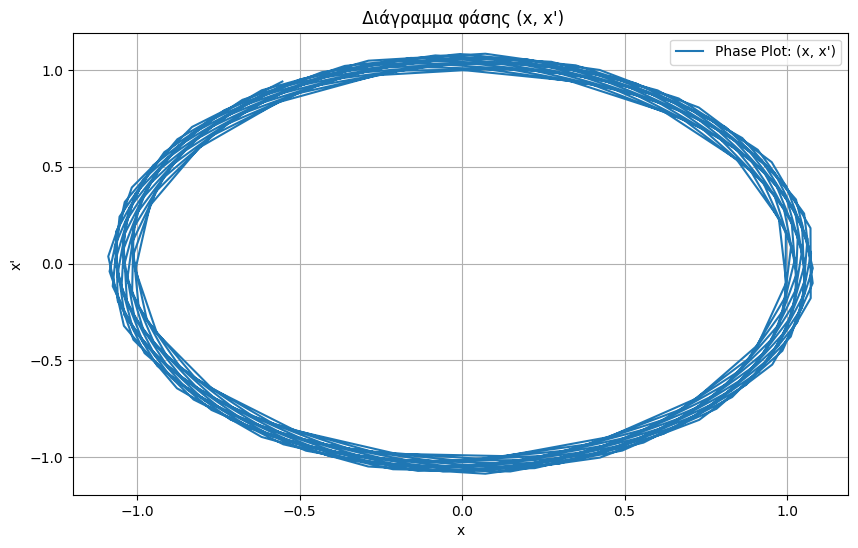

[(0.0, 1.0),
 (0.5923762635836227, -0.7922734847235472),
 (-0.9625524215802203, 0.2828115476723478),
 (0.933243196040832, 0.34708656240684205),
 (-0.5478620172683586, -0.8446736740471478)]

In [447]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Ορίζουμε τη διαφορική εξίσωση
def diffeq(t, u):
    u1, u2 = u
    return [u2, 0.01*u2*(1-u2**2) - u1]

# Αρχικές συνθήκες
u0 = [0, 1]

# Ορίζουμε το χρονικό εύρος
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Λύνουμε τη διαφορική εξίσωση
sol = solve_ivp(diffeq, t_span, u0, t_eval=t_eval, atol=1e-6, rtol=1e-9)

# Παίρνουμε μερικές τιμές για x(t)
selected_t_values = np.linspace(0, 10, 5)
selected_x_values = np.interp(selected_t_values, sol.t, sol.y[0])

# Πλοτάρουμε τη λύση
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.scatter(selected_t_values, selected_x_values, color='red')
plt.title('Λύση x(t)')
plt.xlabel('Χρόνος t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

selected_t_values, selected_x_values

# Πλοτάρουμε το γράφημα (x, x')
plt.figure(figsize=(10, 6))
plt.plot(sol.y[0], sol.y[1], label='Phase Plot: (x, x\')')
plt.title(' Διάγραμμα φάσης (x, x\')')
plt.xlabel('x')
plt.ylabel('x\'')
plt.legend()
plt.grid(True)
plt.show()

# Επιλέγουμε τιμές για x(t) και x'(t) με ακρίβεια τάξης 10^-6
selected_phase_values = [(x, dx) for x, dx in zip(selected_x_values, np.interp(selected_t_values, sol.t, sol.y[1]))]
selected_phase_values


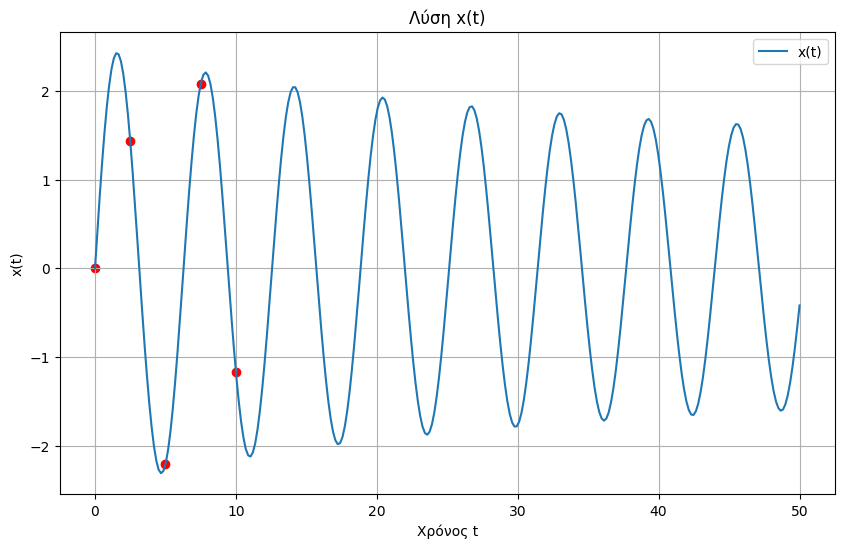

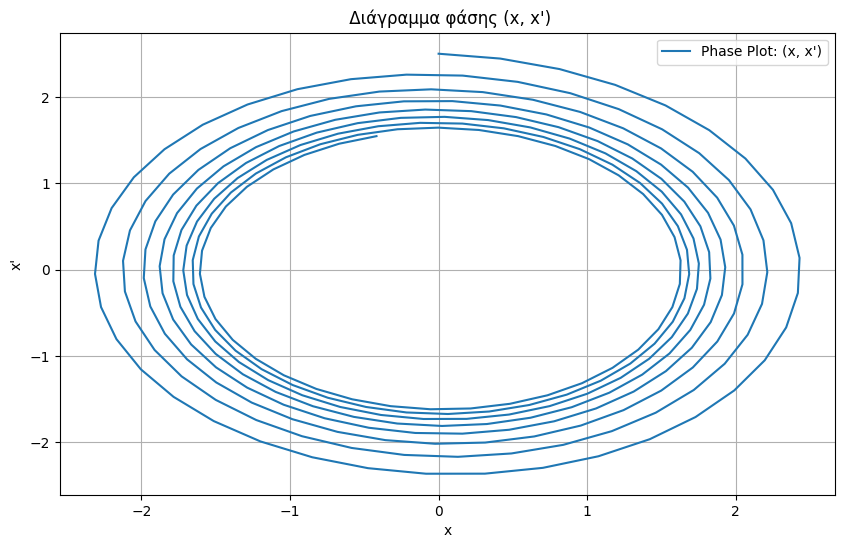

[(0.0, 2.5),
 (1.4362400280338936, -1.9504086215801335),
 (-2.208516700211628, 0.6748789044469095),
 (2.076528235235683, 0.7485300411354123),
 (-1.1652316076674556, -1.7789981870935065)]

In [448]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Ορίζουμε τη διαφορική εξίσωση
def diffeq(t, u):
    u1, u2 = u
    return [u2, 0.01*u2*(1-u2**2) - u1]

# Αρχικές συνθήκες
u0 = [0, 2.5]

# Ορίζουμε το χρονικό εύρος
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Λύνουμε τη διαφορική εξίσωση
sol = solve_ivp(diffeq, t_span, u0, t_eval=t_eval, atol=1e-6, rtol=1e-9)

# Παίρνουμε μερικές τιμές για x(t)
selected_t_values = np.linspace(0, 10, 5)
selected_x_values = np.interp(selected_t_values, sol.t, sol.y[0])

# Πλοτάρουμε τη λύση
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.scatter(selected_t_values, selected_x_values, color='red')
plt.title('Λύση x(t)')
plt.xlabel('Χρόνος t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

selected_t_values, selected_x_values

# Πλοτάρουμε το γράφημα (x, x')
plt.figure(figsize=(10, 6))
plt.plot(sol.y[0], sol.y[1], label='Phase Plot: (x, x\')')
plt.title(' Διάγραμμα φάσης (x, x\')')
plt.xlabel('x')
plt.ylabel('x\'')
plt.legend()
plt.grid(True)
plt.show()

# Επιλέγουμε τιμές για x(t) και x'(t) με ακρίβεια τάξης 10^-6
selected_phase_values = [(x, dx) for x, dx in zip(selected_x_values, np.interp(selected_t_values, sol.t, sol.y[1]))]
selected_phase_values


## Χαρακτηρισμός κίνησης

Έχουμε ένα δυναμικό σύστημα.  

Έχουμε ταλαντώσεις, βλέπουμε ότι το διάγραμμα φάσης δεν κλείνει ή ανοίγει ανάλογα. 
Ανεβάζουμε πολύ τον χρόνο για να φαίνεται. 

1. Στην πρώτη περίπτωση υπάρχει μια αργή σταθεροποίηση σε ένα μεγαλύτερο πλάτος.
2. Στην υπάρχει κάτι παρόμοιο όμως και μια μικρή παλινδρόμηση ανάμεσα σε κάποια πλάτη.  
3. Στην τρίτη περίπτωση υπάρχει μια αργή απόσβεση, το πλάτος μειώνει με τον χρόνο.

Γενικά αυτό που βλέπουμε είναι ταλαντώσεις όπου το πλάτος δεν είναι σταθερό αλλά αλλάζει μικραίνει ή αυξάνει και εν δυνάμει μπορεί και να πετάξει και το σύστημα εκτός ανάλογα την αρχική συνθήκη. 

Το σύστημα είναι ευαίσθητο στις αρχικές συνθήκες.

# Παράρτημα 

## Βελτιστοποίηση με μέθοδο Newton

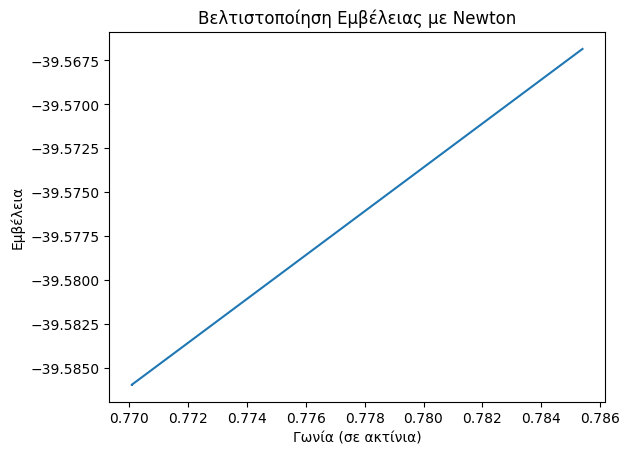

In [449]:



import numpy as np
import matplotlib.pyplot as plt

def calculate_range(theta, v0, Cd, A, rho, m, g):
    term1 = (v0**2 * np.sin(2 * theta)) / g
    term2 = (Cd * A * rho) / (2 * m)
    term3 = (v0**3) / (g**2)
    term4 = 1 - np.cos(theta)**2

    return -term1 + term2 * term3 * term4

def gradient(theta, v0, Cd, A, rho, m, g):
    h = 1e-5  # Πολύ μικρή αλλαγή στη γωνία για τον υπολογισμό του gradient
    df = (calculate_range(theta + h, v0, Cd, A, rho, m, g) - calculate_range(theta, v0, Cd, A, rho, m, g)) / h
    return df

def hessian(theta, v0, Cd, A, rho, m, g):
    h = 1e-5  # Πολύ μικρή αλλαγή στη γωνία για τον υπολογισμό της Εσσιανής
    d2f = (gradient(theta + h, v0, Cd, A, rho, m, g) - gradient(theta, v0, Cd, A, rho, m, g)) / h
    return d2f

def newton_optimization(theta_init, v0, Cd, A, rho, m, g, num_iterations):
    theta_values = [theta_init]
    for _ in range(num_iterations):
        theta_init = theta_init - gradient(theta_init, v0, Cd, A, rho, m, g) / hessian(theta_init, v0, Cd, A, rho, m, g)
        theta_values.append(theta_init)

    return theta_values

# Δεδομένα
v0 = 20.0  # αρχική ταχύτητα σε m/s
Cd = 0.5  # συντελεστής αεροδυναμικής τριβής
A = 0.01  # επιφάνεια της σφαίρας σε m^2
rho = 1.2  # πυκνότητα του αέρα σε kg/m^3
m = 0.1  # μάζα της σφαίρας σε kg
g = 9.8  # επιτάχυνση της βαρύτητας σε m/s^2

# Παράμετροι Newton
num_iterations = 5

# Αρχική γωνία
theta_init = 45.0 * np.pi / 180.0  # Σε ακτίνια

# Εκτέλεση Newton Optimization
theta_values = newton_optimization(theta_init, v0, Cd, A, rho, m, g, num_iterations)

# Υπολογισμός εμβέλειας για κάθε γωνία
range_values = [calculate_range(theta, v0, Cd, A, rho, m, g) for theta in theta_values]

# Εμφάνιση αποτελεσμάτων
plt.plot(theta_values, range_values)
plt.xlabel('Γωνία (σε ακτίνια)')
plt.ylabel('Εμβέλεια')
plt.title('Βελτιστοποίηση Εμβέλειας με Newton')
plt.show()
